<a href="https://www.kaggle.com/code/nazaninmahmoudy/co2-emission-by-vehicles-prediction?scriptVersionId=256261086" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🌍 CO2 Emission by Vehicles Prediction (2025)

## 📌 Project Overview

This project focuses on analyzing and modeling vehicle CO₂ emissions using a real world dataset from Canada. The primary goal is to understand the structure and relationships within the data, and then build a reliable machine learning model that can accurately predict CO₂ emissions based on vehicle characteristics.

### **🗂️ Dataset Description**

Size: 7,385 rows × 12 columns

Key Fetures:

Make: The brand of the vehicle (e.g., Toyota, Ford).

Model: Includes specific identifiers such as drivetrain or fuel flexibility (e.g., AWD, FFV).

Vehicle Class: Categorizes vehicles by size and type, such as compact cars, SUVs, pickup trucks, and vans.

Engine Size (L): The engine displacement measured in liters.

Cylinders: Number of cylinders in the engine, often correlated with engine power and fuel consumption.

Transmission: Indicates the type of gearbox, including automatic (A), manual (M), continuously variable (AV), and others.

Fuel Type: Specifies the fuel used — regular gasoline (X), premium gasoline (Z), diesel (D), ethanol (E), or natural gas (N).

Fuel Consumption City / Hwy / Comb (L/100 km): Fuel usage in different driving conditions — city, highway, and combined.

Fuel Consumption Comb (mpg): Combined fuel efficiency in miles per gallon. Higher mpg values indicate better fuel economy.

CO₂ Emissions (g/km): The target variable, representing the amount of carbon dioxide emitted per kilometer.


### **📊 Exploratory Data Analysis (EDA)**

In order to get a solid feel for the data before modeling, we kicked things off with an exploratory analysis. The goal was to uncover how different vehicle features connect to CO₂ emissions and fuel efficiency spotting patterns, trends, and relationships that could shape a smarter prediction model.

**🔍 Key Observations**



**Fuel Consumption & Emissions:**
There is a strong positive correlation between fuel consumption (city, highway, combined) and CO₂ emissions. Vehicles that consume more fuel tend to emit more CO₂.

**Fuel Efficiency (mpg)**:
A clear negative relationship exists between fuel efficiency and emissions. Vehicles with higher mpg values are more efficient and produce less CO₂.

**Engine Size & Cylinders:**
Larger engines and more cylinders generally result in higher fuel consumption and emissions. These features are strong predictors of environmental impact.

**Vehicle Class Trends:**
Smaller vehicles (e.g., compact, subcompact) tend to be more fuel-efficient, while larger classes (e.g., SUVs, pickup trucks) show higher emissions.

**Transmission & Fuel Type Patterns:** 
Transmission type and fuel type influence fuel economy. For example, diesel engines often have better fuel efficiency but may not always result in lower emissions. Manual transmissions can offer better control and efficiency in certain vehicle classes.

**Feature Interactions:** 
Some features interact in meaningful ways — for example, engine size combined with vehicle class can amplify or reduce emissions depending on the configuration.


### 🔧**Machine Learning Models**

To predict CO₂ emissions based on vehicle features, four regression models were developed , evaluated and compared to each other .

1 - Simple Linear Regression

2 - Polynomial Regression(Degree 3)

3 - Decision Tree Regressor

4 - K-Nearest Neighbors Regressor (KNN)


**Final Model**: 

**Polynomial Regression** was chosen as the final model due to its consistently strong and stable performance in capturing non-linear relationships between vehicle features and CO₂ emissions.

### **📈 Model Evaluation Of Final Model**

**R² Score (Train):** 0.9978

**R² Score (Test):** 0.9975

**Root Mean Squared Error (RMSE - Train)**: 2.78

**Root Mean Squared Error (RMSE - Test):** 3.01

**Mean Absolute Error (MAE - Train):** 2.08

**Mean Absolute Error (MAE - Test):** 2.34

**RMSE / Mean Target Ratio (Train):** ~1.1%

**RMSE / Mean Target Ratio (Test):** ~1.2%

### **📂 Dataset** 

Kaggle Dataset URL: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles/data

### **👩‍💻 Contact**      

📌 Project by: Nazanin Mahmoudy, 2025    
📧 Email: Nazaninmahmoudy@gmail.com      
🔗 GitHub: https://github.com/Nazaninmahmoudi                 
🔗 Kaggle: https://www.kaggle.com/nazaninmahmoudy          

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from scipy.stats import kruskal
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")


## Importing Dataset

In [2]:
df=pd.read_csv('/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv')
df

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

In [3]:
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

There are both categorical and numerical fetures in this dataset

## Cleaning Data

### Missing Values

In [4]:
missing_counts = df.isna().sum()

missing_percent = (df.isna().sum() / len(df)) * 100

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

extra_missing = {}
for col in categorical_cols:
    extra_missing[col] = (df[col].astype(str).str.strip() == "").sum()

print("NaN Missing Values:\n", missing_counts)
print("\nExtra Missing in Categoricals (Empty strings):\n", extra_missing)

NaN Missing Values:
 Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

Extra Missing in Categoricals (Empty strings):
 {'Make': 0, 'Model': 0, 'Vehicle Class': 0, 'Transmission': 0, 'Fuel Type': 0}


### Duplicate Handeling

In [5]:
full_duplicates = df[df.duplicated(keep=False)]
print("Full Duplicates", full_duplicates.shape[0])

Full Duplicates 2102


In [6]:
key_cols = [
    'Make',
    'Model',
    'Vehicle Class',
    'Engine Size(L)',
    'Cylinders',
    'Transmission',
    'Fuel Type'
]

In [7]:
subset_duplicates = df[df.duplicated(subset=key_cols, keep=False)]

print("Duplicaes based on key fetures:", subset_duplicates.shape[0])

Duplicaes based on key fetures: 5715


In [8]:
duplicate_counts = df.groupby(list(df.columns)).size().reset_index(name='count')
duplicates_more_than_one = duplicate_counts[duplicate_counts['count'] > 1]

for i in range(min(5, len(duplicates_more_than_one))):
    display(duplicates_more_than_one.iloc[i].to_frame().reset_index().rename(columns={"index": "Column", i: "Value"}))


Column        3
0                               Make    ACURA
1                              Model      ILX
2                      Vehicle Class  COMPACT
3                     Engine Size(L)      2.4
4                          Cylinders        4
5                       Transmission      AM8
6                          Fuel Type        Z
7   Fuel Consumption City (L/100 km)      9.4
8    Fuel Consumption Hwy (L/100 km)      6.8
9   Fuel Consumption Comb (L/100 km)      8.2
10       Fuel Consumption Comb (mpg)       34
11               CO2 Emissions(g/km)      192
12                             count        2

Column        4
0                               Make    ACURA
1                              Model      ILX
2                      Vehicle Class  COMPACT
3                     Engine Size(L)      2.4
4                          Cylinders        4
5                       Transmission      AM8
6                          Fuel Type        Z
7   Fuel Consumption City (L/100 km)      9.9
8    Fuel Consumption Hwy (L/100 km)      7.0
9   Fuel Consumption Comb (L/100 km)      8.6
10       Fuel Consumption Comb (mpg)       33
11               CO2 Emissions(g/km)      199
12                             count        2

Column              10
0                               Make           ACURA
1                              Model  MDX HYBRID AWD
2                      Vehicle Class     SUV - SMALL
3                     Engine Size(L)             3.0
4                          Cylinders               6
5                       Transmission             AM7
6                          Fuel Type               Z
7   Fuel Consumption City (L/100 km)             9.1
8    Fuel Consumption Hwy (L/100 km)             9.0
9   Fuel Consumption Comb (L/100 km)             9.0
10       Fuel Consumption Comb (mpg)              31
11               CO2 Emissions(g/km)             210
12                             count               2

Column              11
0                               Make           ACURA
1                              Model  MDX Hybrid AWD
2                      Vehicle Class     SUV - SMALL
3                     Engine Size(L)             3.0
4                          Cylinders               6
5                       Transmission             AM7
6                          Fuel Type               Z
7   Fuel Consumption City (L/100 km)             9.1
8    Fuel Consumption Hwy (L/100 km)             9.0
9   Fuel Consumption Comb (L/100 km)             9.0
10       Fuel Consumption Comb (mpg)              31
11               CO2 Emissions(g/km)             210
12                             count               2

Column           15
0                               Make        ACURA
1                              Model   MDX SH-AWD
2                      Vehicle Class  SUV - SMALL
3                     Engine Size(L)          3.5
4                          Cylinders            6
5                       Transmission          AS9
6                          Fuel Type            Z
7   Fuel Consumption City (L/100 km)         12.6
8    Fuel Consumption Hwy (L/100 km)          9.0
9   Fuel Consumption Comb (L/100 km)         11.0
10       Fuel Consumption Comb (mpg)           26
11               CO2 Emissions(g/km)          259
12                             count            2

In our dataset, we detect two types of duplicates: 
Full duplicates : rows where **all columns have identical values.** 
Key‑feature duplicates : rows that share the same key attributes (Make, Model, Vehicle Class, Engine Size (L), Cylinders, Transmission, Fuel Type , but may differ in other fields, such as emissions data or year.

This distinction helps identify both exact data repetitions and records that are similar in core specs but not entirely identical.

In [9]:
df_cleaned = df.drop_duplicates(keep='first')
print("Rows before:", len(df))
print("Rows after:", len(df_cleaned))


Rows before: 7385
Rows after: 6282


Full duplicates were removed in order to prevent model bias towared them.

In [10]:
def get_unique_values(df, threshold=10):
    
    output_data = []

    for col in df.columns:
        num_unique = df[col].nunique()
        col_dtype = df[col].dtype
        
        if num_unique <= threshold:
            unique_values = df[col].unique()
        else:
            unique_values = "-"
        
        output_data.append([col, num_unique, unique_values, col_dtype])
    
    output_df = pd.DataFrame(output_data, 
                             columns=['Column Name', 'Number of Unique Values', 'Unique Values', 'Data Type'])
    
    return output_df

In [11]:
df_summary = get_unique_values(df_cleaned)
df_summary

Column Name  Number of Unique Values  \
0                               Make                       42   
1                              Model                     2053   
2                      Vehicle Class                       16   
3                     Engine Size(L)                       51   
4                          Cylinders                        8   
5                       Transmission                       27   
6                          Fuel Type                        5   
7   Fuel Consumption City (L/100 km)                      211   
8    Fuel Consumption Hwy (L/100 km)                      143   
9   Fuel Consumption Comb (L/100 km)                      181   
10       Fuel Consumption Comb (mpg)                       54   
11               CO2 Emissions(g/km)                      331   

                  Unique Values Data Type  
0                             -    object  
1                             -    object  
2                             -    object  
3                             -   float64  
4   [4, 6, 12, 8, 10, 3, 5, 16]     int64  
5                             -    object  
6               [Z, D, X, E, N]    object  
7                             -   float64  
8                             -   float64  
9                             -   float64  
10                            -     int64  
11                            -     int64

Categorical: Make, Model, Vehicle Class, Transmission, Fuel Type

Numerical: Engine Size (L), Cylinders, all fuel consumption metrics, CO₂ Emissions

Model has 2,053 unique values representng highly varied dataset in vehicle models.

Fuel Type has only 5 types 

Cylinders is limited to 8 unique counts

Engine Size (L) spans from under 1.0 to well above 8.0 meaning there is strong potential to study how engine size impacts fuel use and CO₂ output.

In [12]:
df_cleaned.describe().T

count        mean        std   min    25%  \
Engine Size(L)                    6282.0    3.161812   1.365201   0.9    2.0   
Cylinders                         6282.0    5.618911   1.846250   3.0    4.0   
Fuel Consumption City (L/100 km)  6282.0   12.610220   3.553066   4.2   10.1   
Fuel Consumption Hwy (L/100 km)   6282.0    9.070583   2.278884   4.0    7.5   
Fuel Consumption Comb (L/100 km)  6282.0   11.017876   2.946876   4.1    8.9   
Fuel Consumption Comb (mpg)       6282.0   27.411016   7.245318  11.0   22.0   
CO2 Emissions(g/km)               6282.0  251.157752  59.290426  96.0  208.0   

                                    50%    75%    max  
Engine Size(L)                      3.0    3.7    8.4  
Cylinders                           6.0    6.0   16.0  
Fuel Consumption City (L/100 km)   12.1   14.7   30.6  
Fuel Consumption Hwy (L/100 km)     8.7   10.3   20.6  
Fuel Consumption Comb (L/100 km)   10.6   12.7   26.1  
Fuel Consumption Comb (mpg)        27.0   32.0   69.0  
CO2 Emissions(g/km)               246.0  289.0  522.0

## EDA

### categorical Fetures

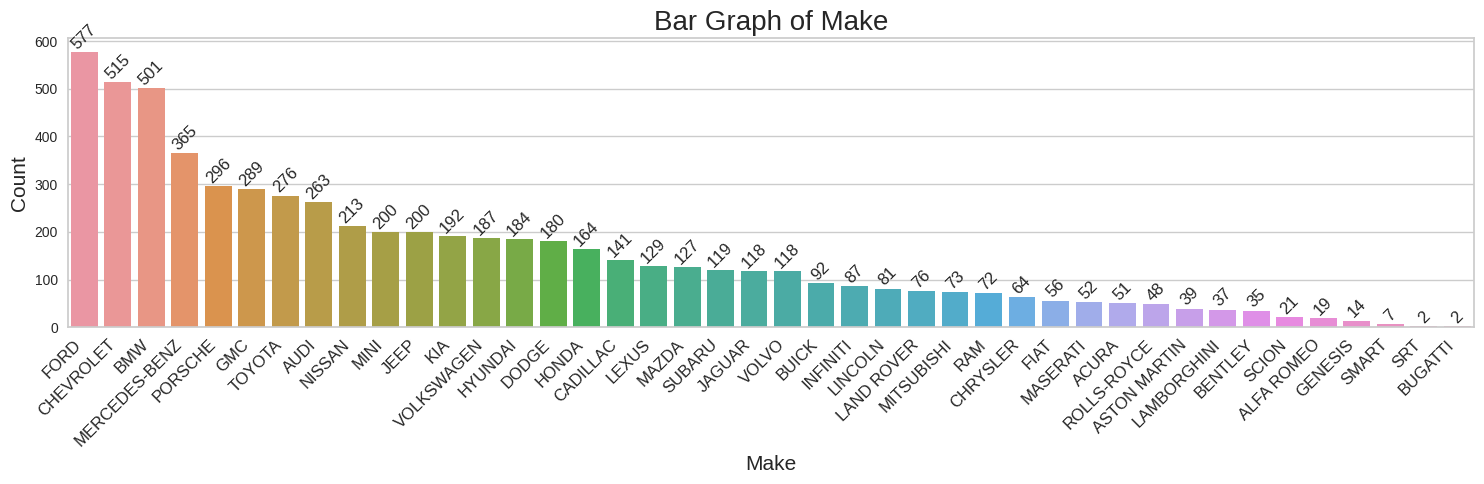

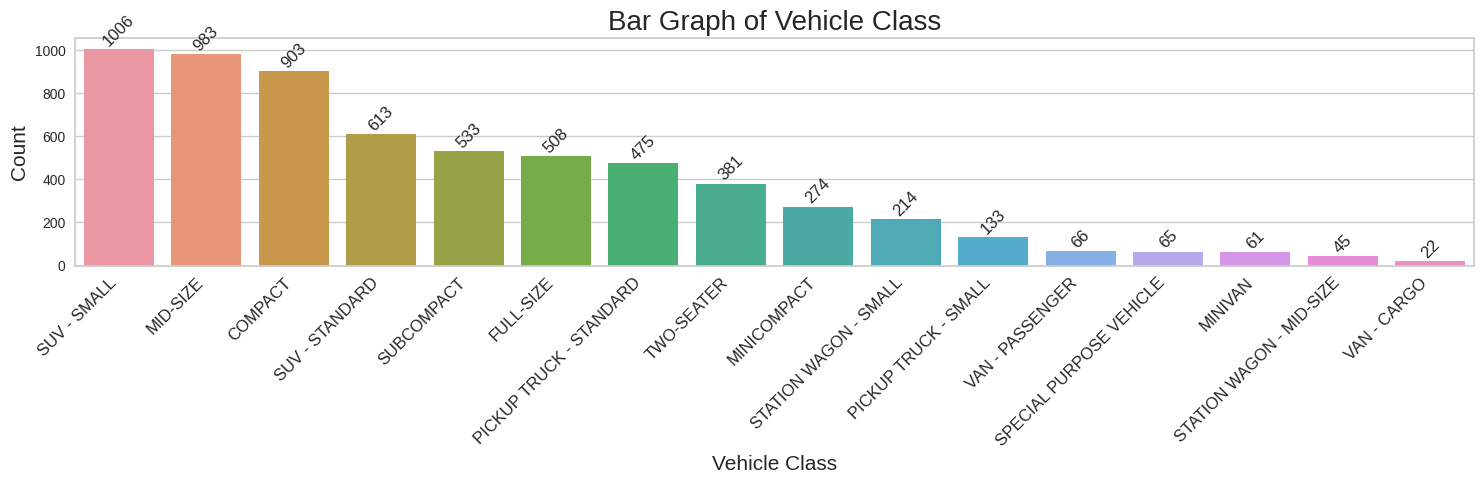

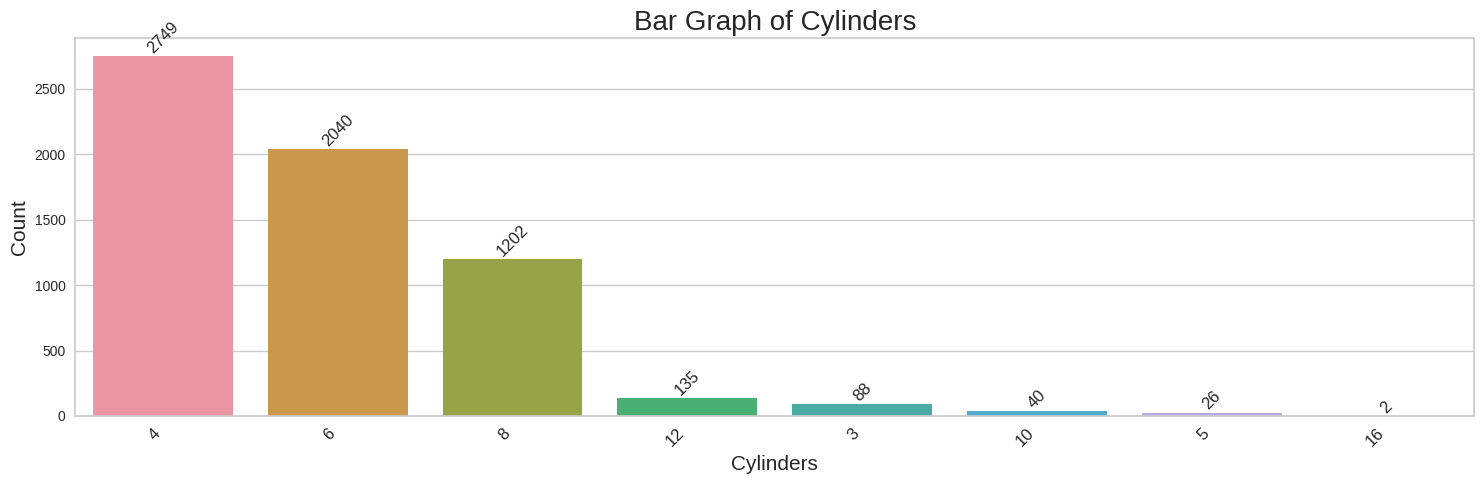

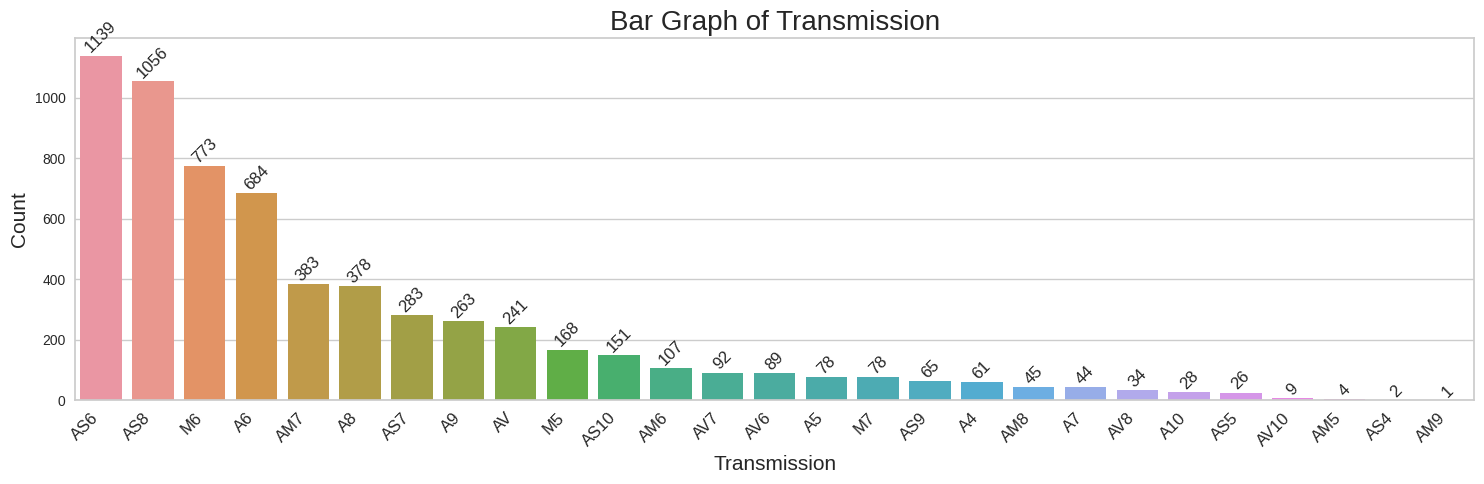

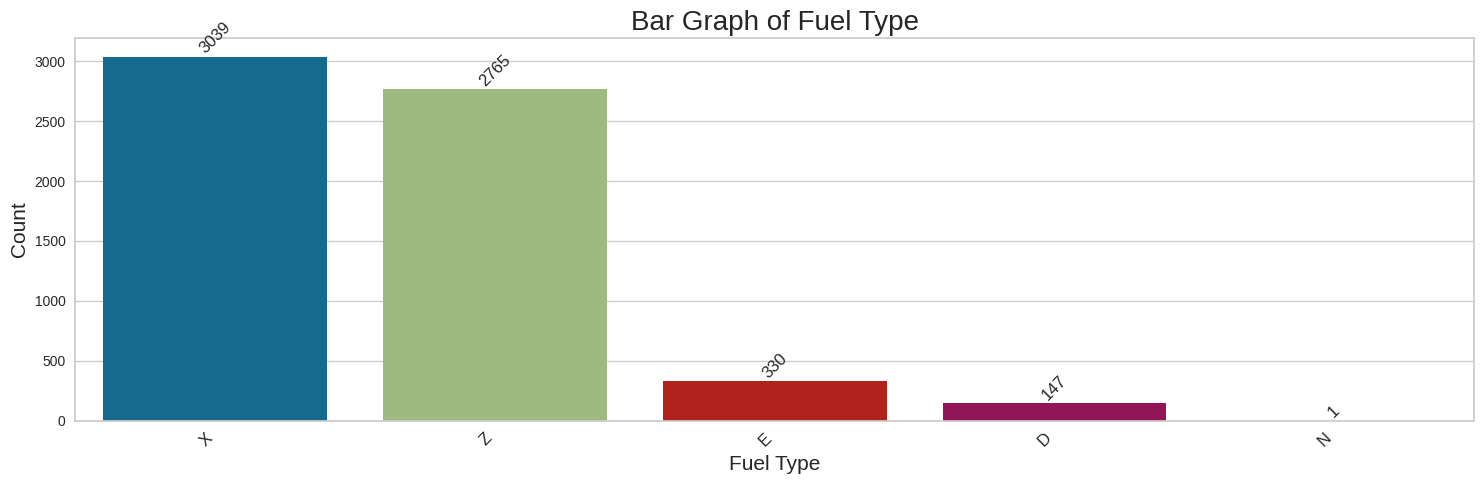

In [13]:
def plot_bar_graphs_auto(df):
    cat_columns = [col for col in df.columns if (df[col].dtype == 'object' or df[col].nunique() <= 10)]
    
    cat_columns = [col for col in cat_columns if col.lower() != 'model']
    
    for column in cat_columns:
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0], rotation=45)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Bar Graph of {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.tight_layout()
        plt.show()

plot_bar_graphs_auto(df_cleaned)


This code goes through the categorical columns and draws a bar chart in order to represent the number of each category in those columns.

Car Make: The dataset is heavily imbalanced. Ford and Chevrolet have the most entries, while brands like SRT and Bugatti appear only a few times.

Vehicle Class: Same pattern as Make, but with fewer class categories overall.

Cylinders: Most cars have either 4, 6, or 8 cylinders.

Transmission:AS6 and AS8 are the most common; over 25 types exist, but many are rare like AM10, AS4, and AV10.

Fule Type: while types X,Z have the height number of instance ,type N has only 1 

In [14]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

### Fuel Efficiency vs CO₂ Emissions

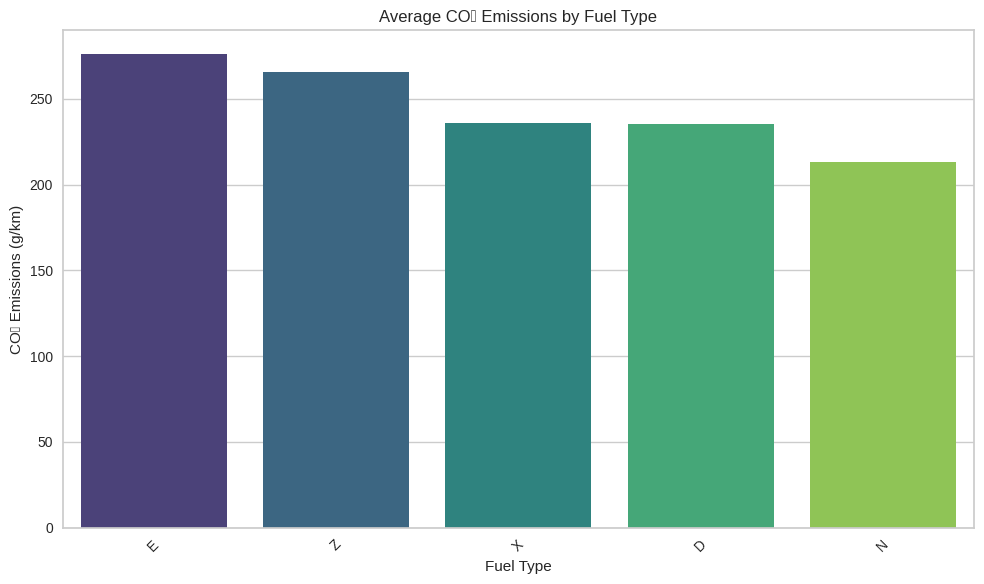

In [15]:
fuel_co2 = df_cleaned.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().reset_index()
fuel_co2 = fuel_co2.sort_values(by='CO2 Emissions(g/km)', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=fuel_co2, x='Fuel Type', y='CO2 Emissions(g/km)', palette='viridis')
plt.title('Average CO₂ Emissions by Fuel Type')
plt.ylabel('CO₂ Emissions (g/km)')
plt.xlabel('Fuel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


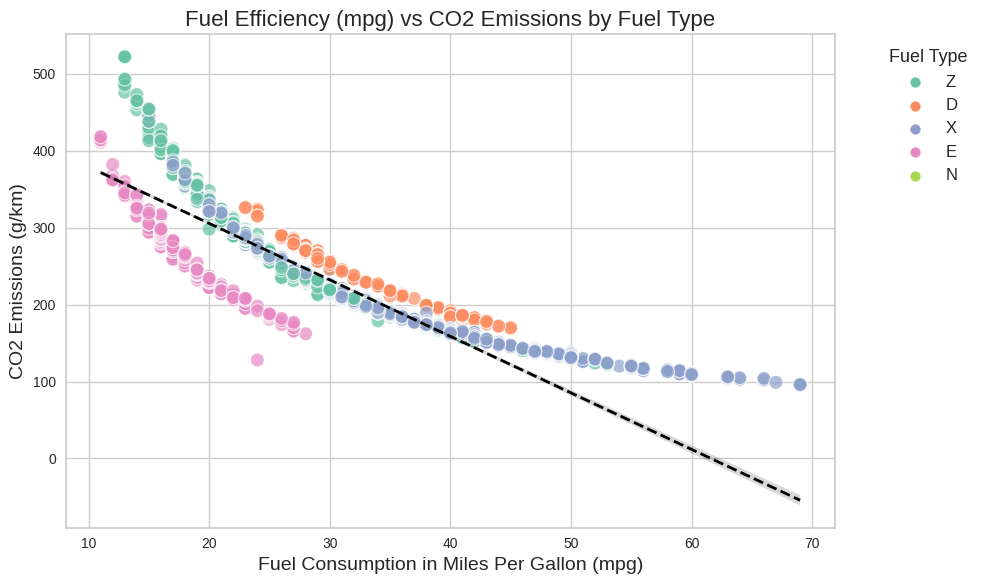

In [16]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df,
    x='Fuel Consumption Comb (mpg)',
    y='CO2 Emissions(g/km)',
    hue='Fuel Type',
    palette='Set2',
    s=100,
    alpha=0.7
)

sns.regplot(
    data=df,
    x='Fuel Consumption Comb (mpg)',
    y='CO2 Emissions(g/km)',
    scatter=False,
    color='black',
    line_kws={'linewidth':2, 'linestyle':'--'}
)

plt.title('Fuel Efficiency (mpg) vs CO2 Emissions by Fuel Type', fontsize=16)
plt.xlabel('Fuel Consumption in Miles Per Gallon (mpg)', fontsize=14)
plt.ylabel('CO2 Emissions (g/km)', fontsize=14)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Fuel Type', fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.show()


what we can see is s a clear inverse relationship meaning as mpg increases, CO₂ emissions go down.

The black dashed line confirms this trend that the better fuel efficiency means less pollution.

**Different fuel types are spread out differently. Some (like X or N) cluster around higher mpg and lower emissions, while others (like E or Z) tend to be less efficient and more polluting.**

### Average CO₂ Emissions by Vehicle Class

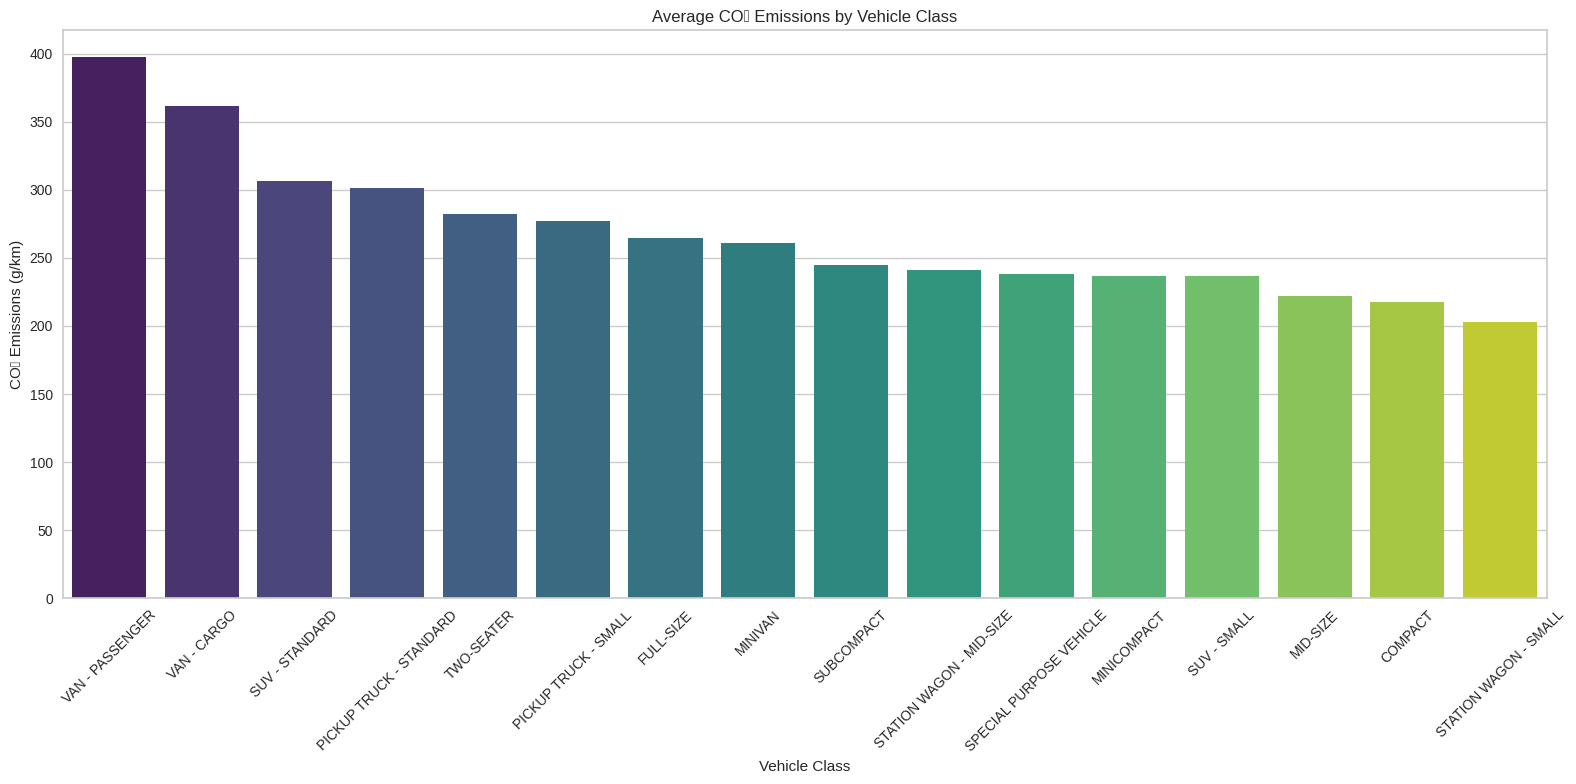

In [17]:
fuel_co2 = df_cleaned.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().reset_index()

fuel_co2 = fuel_co2.sort_values(by='CO2 Emissions(g/km)', ascending=False)

plt.figure(figsize=(16,8))
sns.barplot(data=fuel_co2, x='Vehicle Class', y='CO2 Emissions(g/km)', palette='viridis')
plt.title('Average CO₂ Emissions by Vehicle Class')
plt.ylabel('CO₂ Emissions (g/km)')
plt.xlabel('Vehicle Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can see that fuel types E and Z tend to have CO₂ emissions above 250 g/km, and they mostly show up in heavier or performance oriented vehicle classes like vans, trucks, two-seaters, and full-size cars. 

These vehicles generally have bigger engines and more cylinders, which explains the higher emission levels.

Fuel types D and X fall in the mid-range, around 210 to 260 g/km, and are mostly found in SUVs, minivans, and station wagons vehicles that balance power and practicality.
Interestingly, fuel type N is used by only one vehicle type in the dataset, and it belongs to the station wagon  small class, making it the rarest fuel type in this collection.

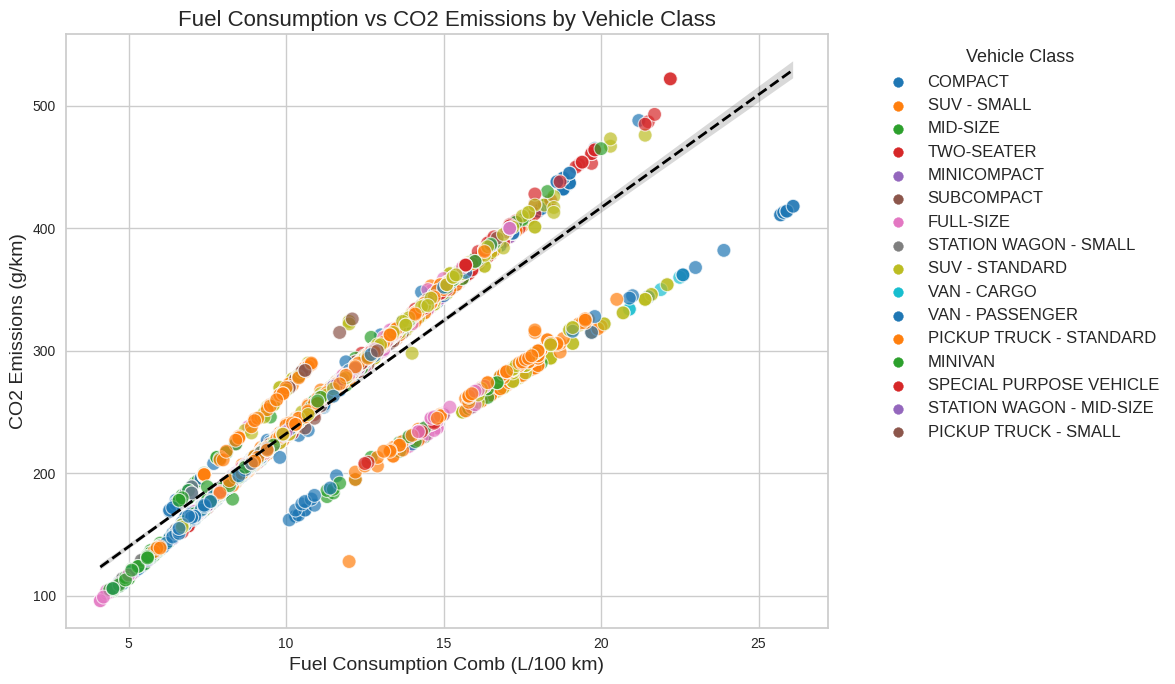

In [18]:
plt.figure(figsize=(12,7))

sns.scatterplot(
    data=df_cleaned,
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    hue='Vehicle Class',
    palette='tab10',  
    s=100,  
    alpha=0.7
)

sns.regplot(
    data=df_cleaned,
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    scatter=False,
    color='black',
    line_kws={'linewidth':2, 'linestyle':'--'}
)

plt.title('Fuel Consumption vs CO2 Emissions by Vehicle Class', fontsize=16)
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize=14)
plt.ylabel('CO2 Emissions (g/km)', fontsize=14)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Vehicle Class', fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.show()


There’s a clear pattern: lower mpg = higher CO₂ emissions.

Bigger vehicles like vans, pickups, and full-size SUVs tend to sit on the high-emission, low-efficiency side.

Smaller cars like compact, subcompact, and two-seaters are more fuel-efficient and cleaner.

### Average CO₂ Emissions by Engine Size

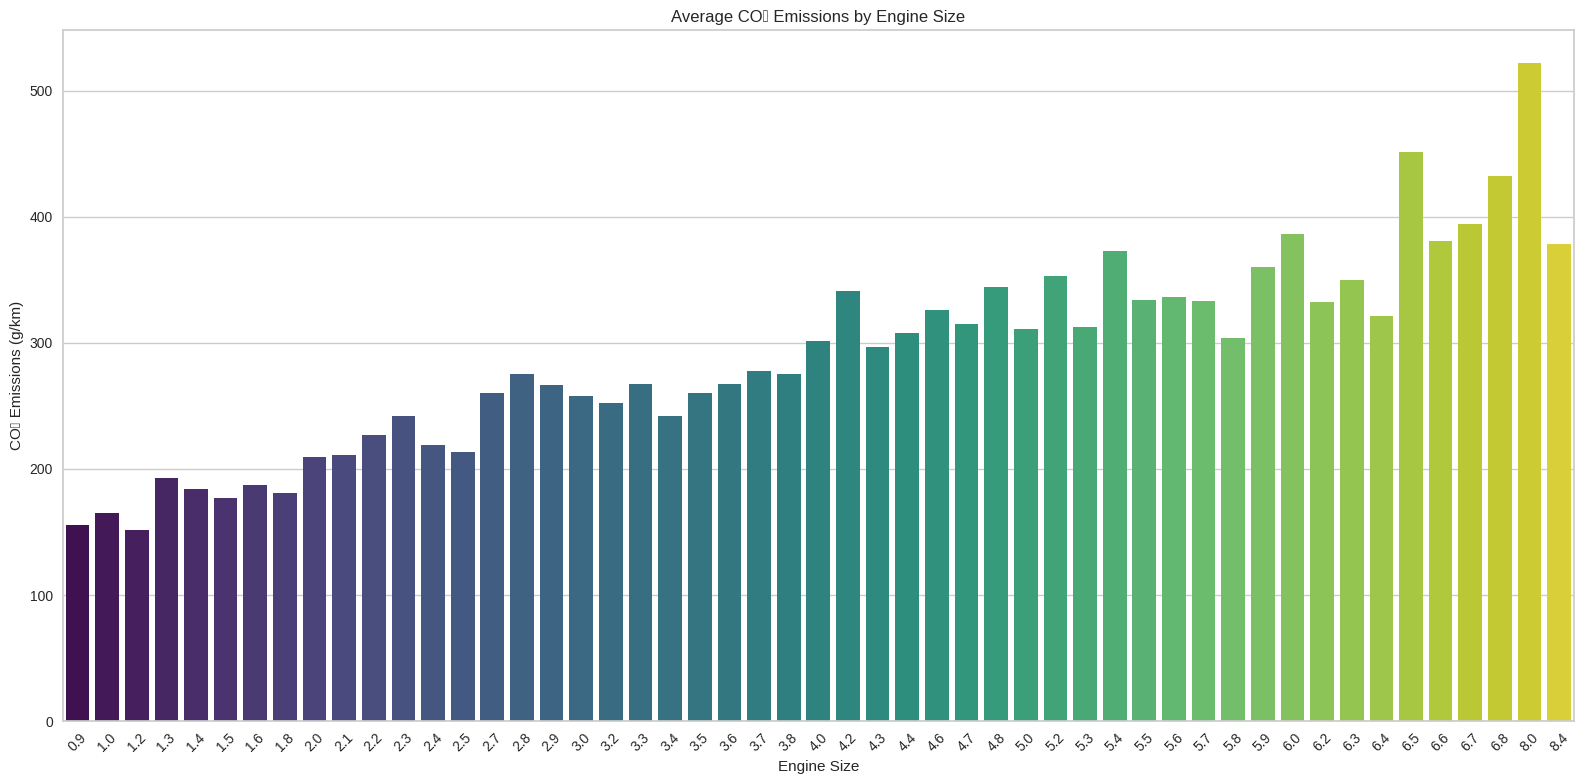

In [19]:
fuel_co2 = df_cleaned.groupby('Engine Size(L)')['CO2 Emissions(g/km)'].mean().reset_index()

fuel_co2 = fuel_co2.sort_values(by='CO2 Emissions(g/km)', ascending=False)

plt.figure(figsize=(16,8))
sns.barplot(data=fuel_co2, x='Engine Size(L)', y='CO2 Emissions(g/km)', palette='viridis')
plt.title('Average CO₂ Emissions by Engine Size')
plt.ylabel('CO₂ Emissions (g/km)')
plt.xlabel('Engine Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


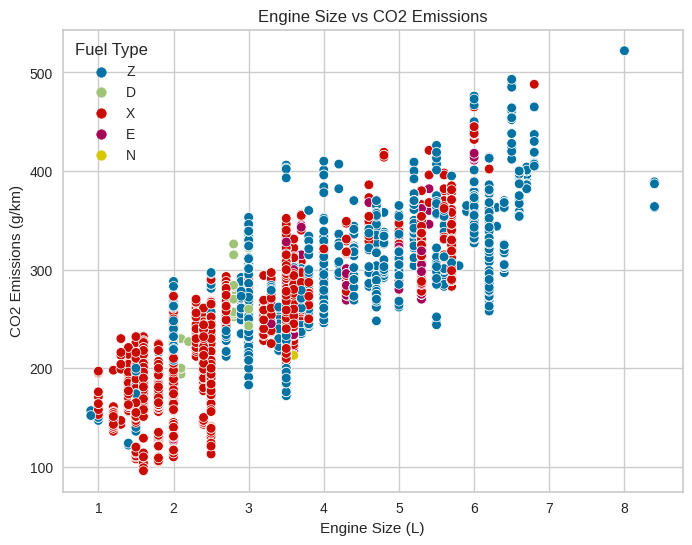

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df, hue='Fuel Type')
plt.title('Engine Size vs CO2 Emissions')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

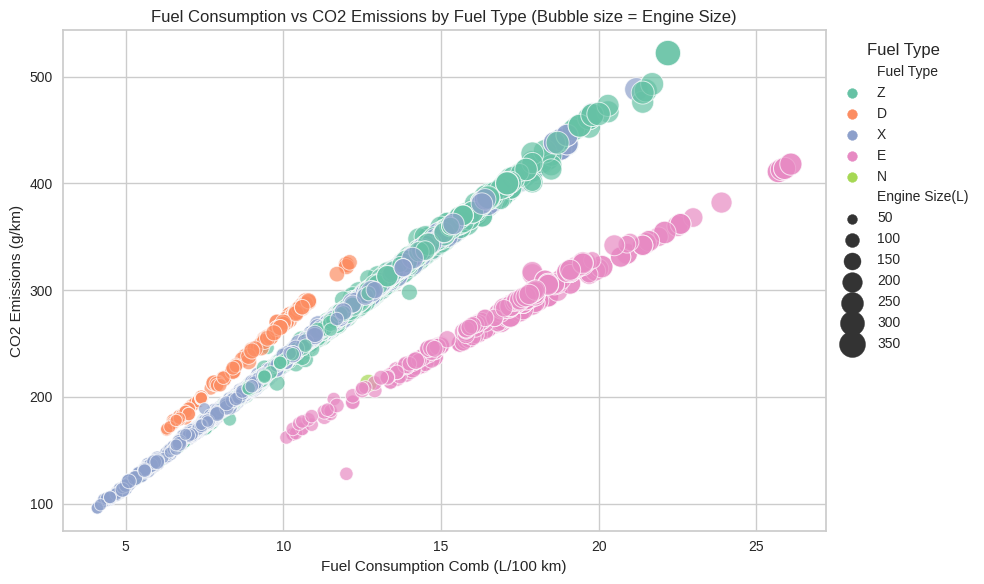

In [21]:
plt.figure(figsize=(10,6))

sizes = df_cleaned['Engine Size(L)']
sizes_normalized = 50 + (sizes - sizes.min()) / (sizes.max() - sizes.min()) * 300  

sns.scatterplot(
    data=df_cleaned,
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    hue='Fuel Type',
    size=sizes_normalized,
    sizes=(50, 350),  
    alpha=0.7,
    palette='Set2'
)

plt.title('Fuel Consumption vs CO2 Emissions by Fuel Type (Bubble size = Engine Size)')
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions (g/km)')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Fuel Type')
plt.tight_layout()
plt.show()


what we can see here is , as engine size increases, average CO₂ emissions also rise. This relationship is **nearly linear**, especially for engines above 2.0 liters.

### Distribution of Vehicle Classes by Engine Size

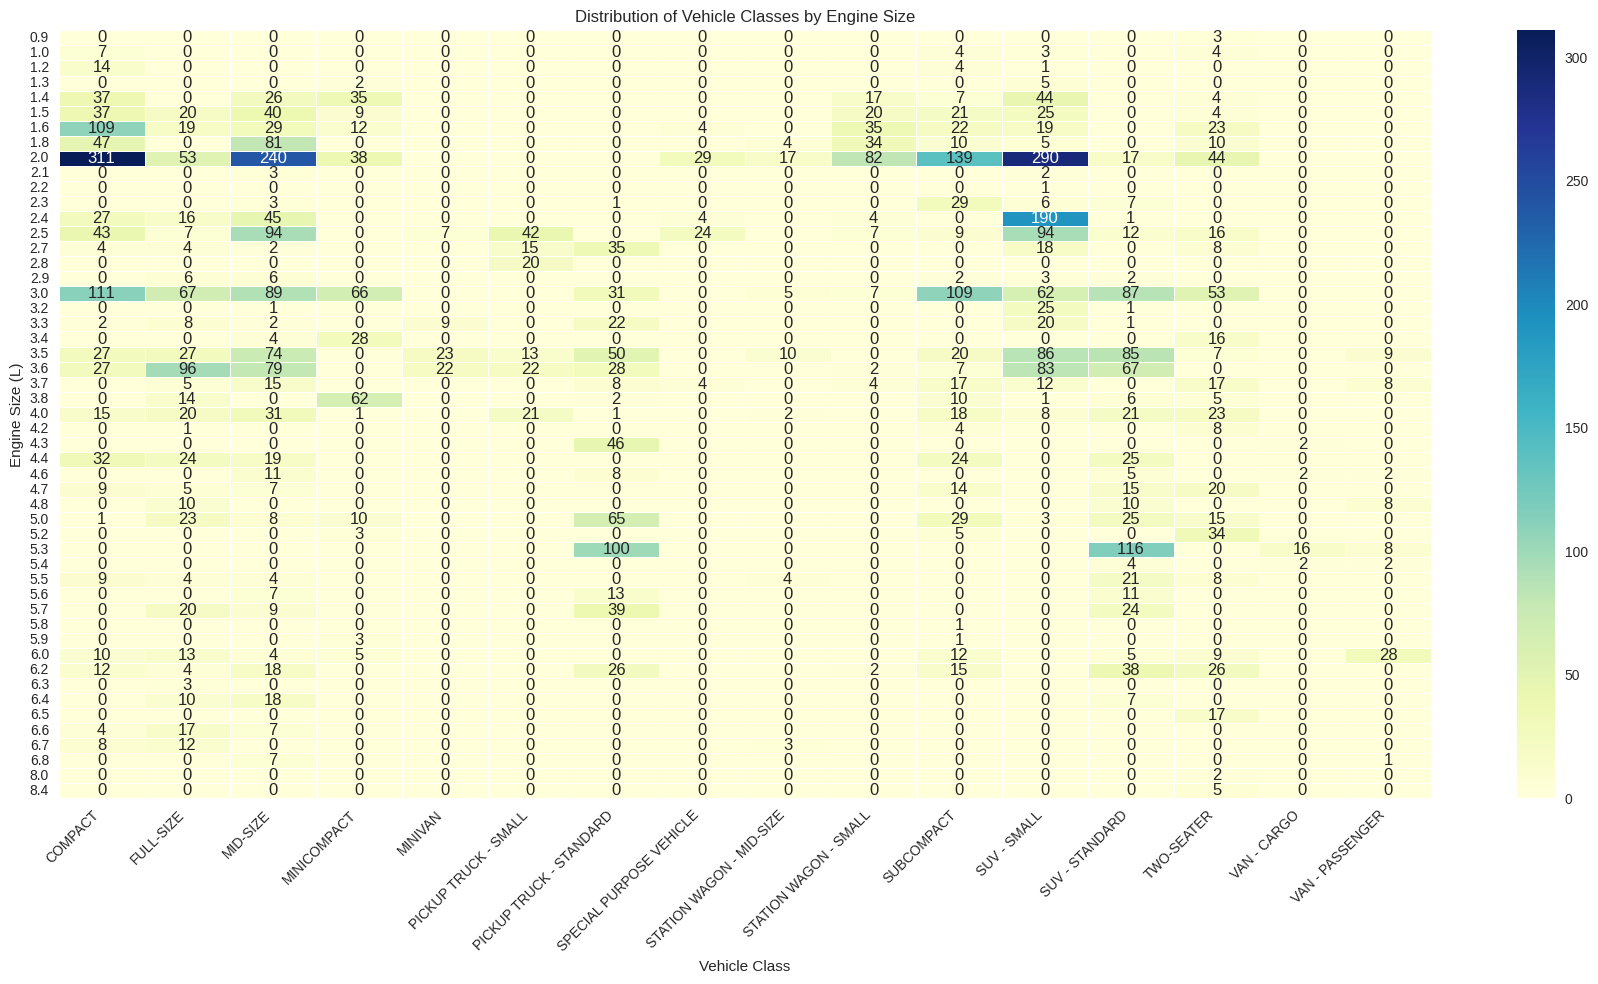

In [22]:
engine_class_counts = df_cleaned.groupby(['Engine Size(L)', 'Vehicle Class']).size().unstack(fill_value=0)

plt.figure(figsize=(18, 10))
sns.heatmap(engine_class_counts, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Distribution of Vehicle Classes by Engine Size')
plt.xlabel('Vehicle Class')
plt.ylabel('Engine Size (L)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Small Engines (1.0 to 2.0 L):**                
Common in SUBCOMPACT, COMPACT, MINICOMPACT, STATION WAGON - SMALL classes.

**Medium Engines (2.0 to 3.5 L):**           
Found in SUV - SMALL, SUV - STANDARD, MID-SIZE, MINIVAN, STATION WAGON - MID-SIZE.

**Large Engines (Above 4.0 L):**             
Predominantly used in PICKUP TRUCK - STANDARD, VAN - CARGO, VAN - PASSENGER, SPECIAL PURPOSE VEHICLE, TWO-SEATER, FULL-SIZE.

### Average CO₂ Emissions by Cylinders

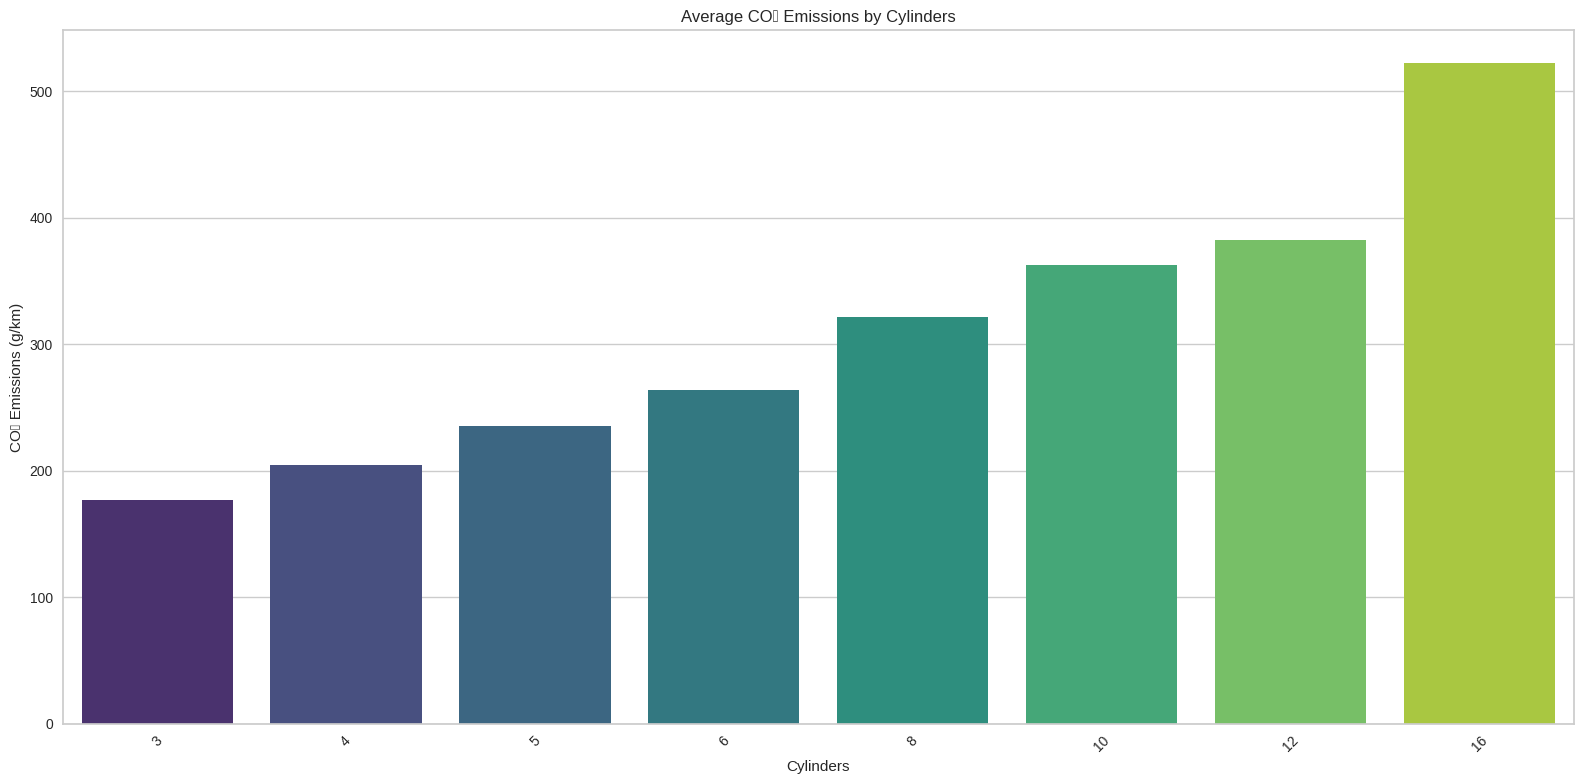

In [23]:
fuel_co2 = df_cleaned.groupby('Cylinders')['CO2 Emissions(g/km)'].mean().reset_index()

fuel_co2 = fuel_co2.sort_values(by='CO2 Emissions(g/km)', ascending=True)

plt.figure(figsize=(16,8))
sns.barplot(data=fuel_co2, x='Cylinders', y='CO2 Emissions(g/km)', palette='viridis')
plt.title('Average CO₂ Emissions by Cylinders')
plt.ylabel('CO₂ Emissions (g/km)')
plt.xlabel('Cylinders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Just like engine size,the more cylinders a vehicle has, the more CO₂ it tends to emit. 
It’s a pretty straightforward pattern: as cylinder count goes up, emissions go up too. The relationship looks mostly linear, meaning each extra cylinder usually means more fuel burned and more CO₂ released.

### Cylinder Count by Vehicle Class

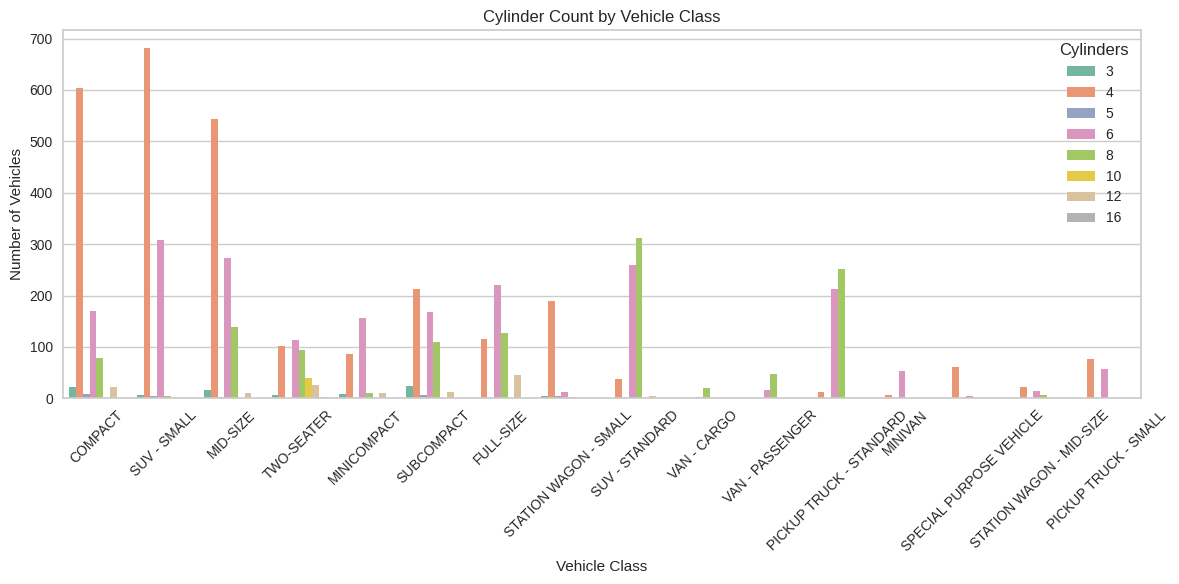

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_cleaned, x='Vehicle Class', hue='Cylinders', palette='Set2')
plt.title('Cylinder Count by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.legend(title='Cylinders')
plt.tight_layout()
plt.show()


**Lower Cylinder Counts (3–4 cylinders):**

Dominant in COMPACT, SUBCOMPACT, MINICOMPACT, STATION WAGON - SMALL, SUV - SMALL.
**4-cylinder engines are by far the most common across nearly all classes.**

**Mid-Range Cylinder Counts (5–6 cylinders):**

Found in MID-SIZE, SUV - STANDARD, MINIVAN, STATION WAGON - MID-SIZE.

**High Cylinder Counts (8–16 cylinders):**

Concentrated in FULL-SIZE, TWO-SEATER, PICKUP TRUCK - STANDARD, VAN - CARGO, VAN - PASSENGER, SPECIAL PURPOSE VEHICLE.

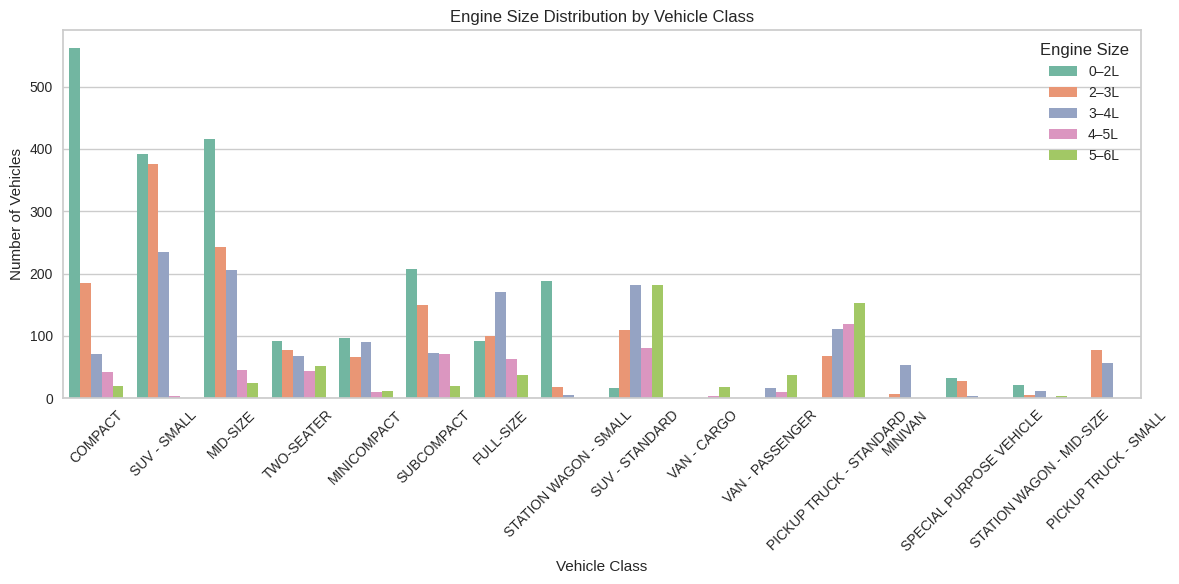

In [25]:
df['Engine Size Bin'] = pd.cut(df_cleaned['Engine Size(L)'], bins=[0, 2, 3, 4, 5, 6], labels=['0–2L', '2–3L', '3–4L', '4–5L', '5–6L'])

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Vehicle Class', hue='Engine Size Bin', palette='Set2')
plt.title('Engine Size Distribution by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.legend(title='Engine Size')
plt.tight_layout()
plt.show()


**Small Engines (0–2L, green):**
Mostly found in COMPACT, SUBCOMPACT, MINICOMPACT, STATION WAGON - SMALL, SUV - SMALL.

**Mid Engines (2–3L, orange):**
Common in MID-SIZE, SUV - STANDARD, MINIVAN, STATION WAGON - MID-SIZE.

**Larger Engines (3–4L, blue):**
Show up in SUVs, TWO-SEATER, FULL-SIZE, and some pickup trucks.

**Big Engines (4–5L, purple) and 🩷 Very Big (5–6L, pink):**
Mostly in PICKUP TRUCK - STANDARD, VAN - CARGO, VAN - PASSENGER, SPECIAL PURPOSE VEHICLE.

### Target Variable vs make and transmision

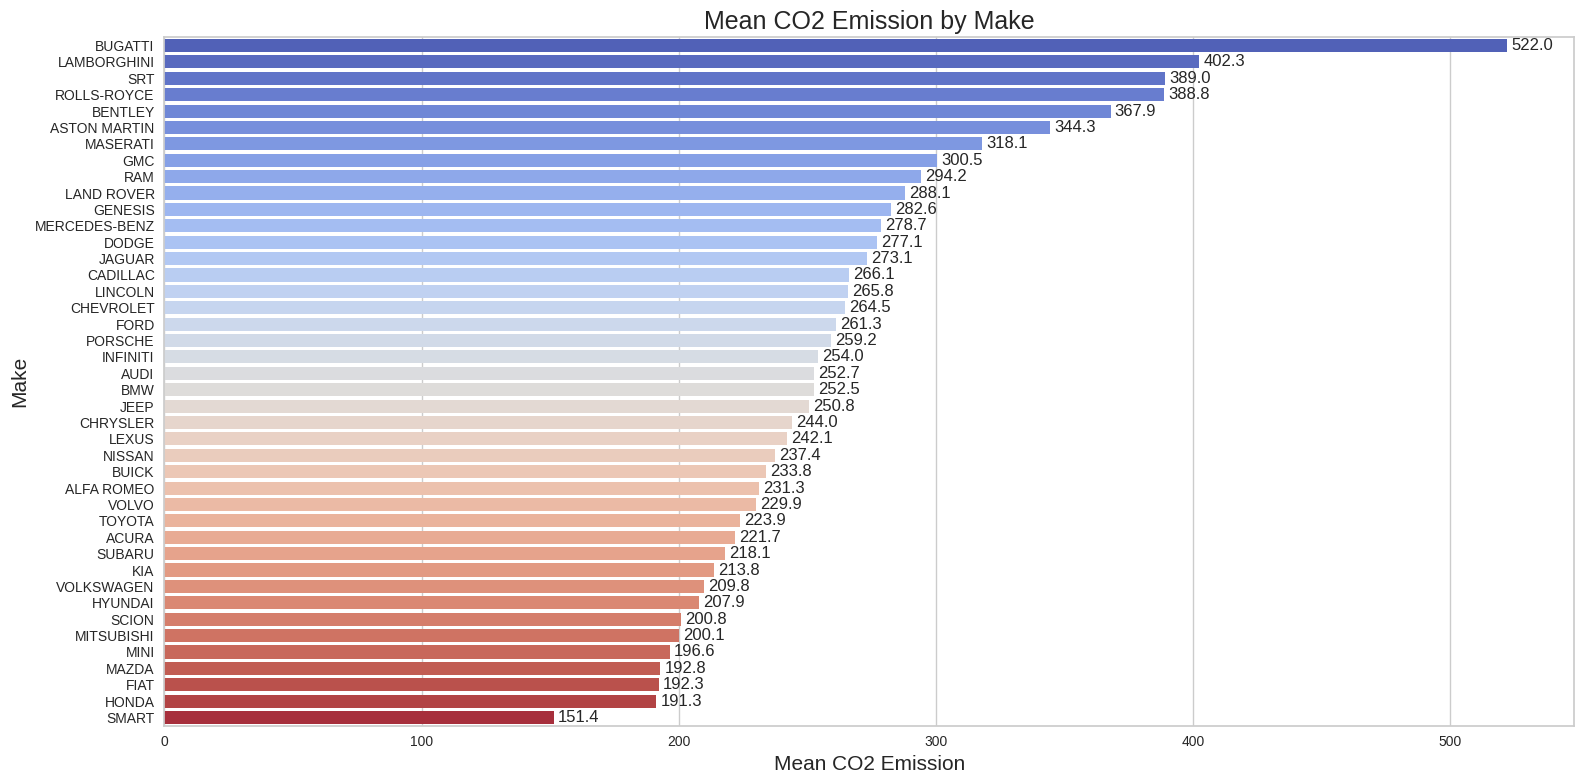

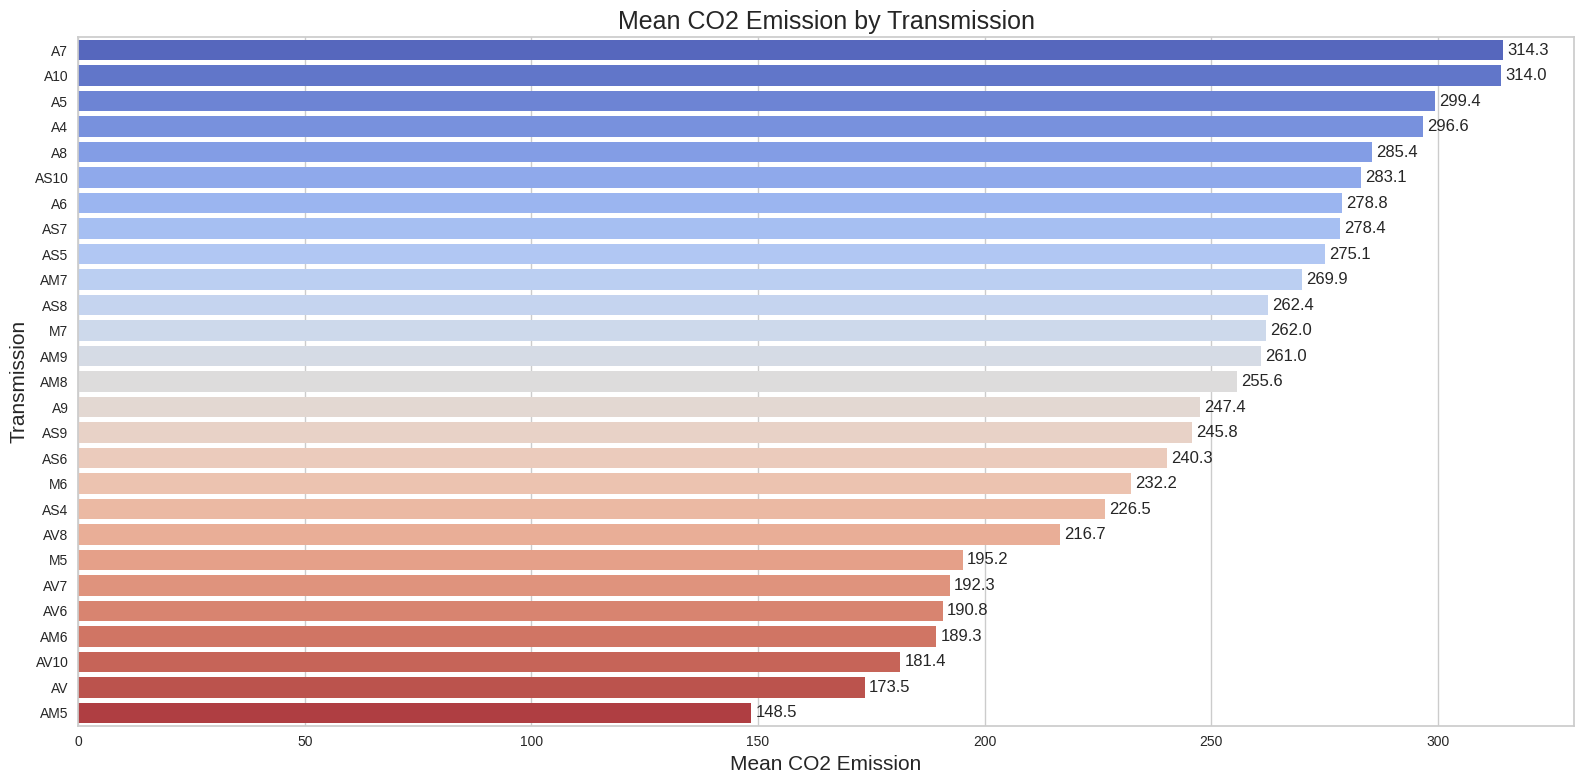

In [26]:
def plot_bar_with_co2_auto(df, color_palette='viridis'):
    cat_columns = [col for col in df.columns if df[col].dtype == 'object' or df[col].nunique() <= 10]
    
    exclude_cols = ['model', 'cylinders', 'vehicle class', 'fuel type']
    
    cat_columns = [col for col in cat_columns if col.lower() not in [ex.lower() for ex in exclude_cols]]
    
    for column in cat_columns:
        plt.figure(figsize=(16, 8))
        
        grouped_data = df.groupby(column)['CO2 Emissions(g/km)'].mean().round(1).reset_index()
        grouped_data_sorted = grouped_data.sort_values(by='CO2 Emissions(g/km)', ascending=False)  
        
        ax = sns.barplot(
            x='CO2 Emissions(g/km)', 
            y=column, 
            data=grouped_data_sorted, 
            palette=color_palette
        )
        
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)
        
        plt.xlabel('Mean CO2 Emission', fontsize=15)
        plt.ylabel(column, fontsize=15)
        plt.title(f'Mean CO2 Emission by {column}', fontsize=18)
        plt.tight_layout()
        plt.show()

plot_bar_with_co2_auto(df_cleaned, color_palette='coolwarm')


#### By Vehicle Class:

**Highest CO₂ emissions:**
Passenger Vans: 397.2 g/km

Cargo Vans: 361.5

Standard SUVs: 306.7

Standard Pickup Trucks: 301.6

**Lowest emissions:**

Small Station Wagons: 202.7

Compact Cars: 217.6

Mid-Size Cars: 222.3

### Mean CO₂ Emission by Transmission Type

**Highest emitters:**

A7 (7-speed automatic): 314.3 g/km

A10 (10-speed automatic): 314.0 g/km

**Lowest emitter:**

AM5 (5-speed automated manual): 148.5 g/km

More gears ≠ lower emissions — in fact, the opposite here.

High-gear automatics are often paired with bigger engines, which explains the higher CO₂.

Simpler transmissions like AM5 are usually in compact more eco friendly

#### Fuel Consumption by Fuel Type

In [27]:
fuel_cols = ['Fuel Consumption City (L/100 km)', 
             'Fuel Consumption Hwy (L/100 km)', 
             'Fuel Consumption Comb (L/100 km)', 
             ]  
colors = {
    'Fuel Consumption City (L/100 km)': 'orange',
    'Fuel Consumption Hwy (L/100 km)': 'green',
    'Fuel Consumption Comb (L/100 km)': 'blue'
}

mean_colors = {
    'Fuel Consumption City (L/100 km)': 'darkorange',
    'Fuel Consumption Hwy (L/100 km)': 'darkgreen',
    'Fuel Consumption Comb (L/100 km)': 'darkblue'
}

median_colors = {
    'Fuel Consumption City (L/100 km)': 'red',
    'Fuel Consumption Hwy (L/100 km)': 'lime',
    'Fuel Consumption Comb (L/100 km)': 'purple'
}

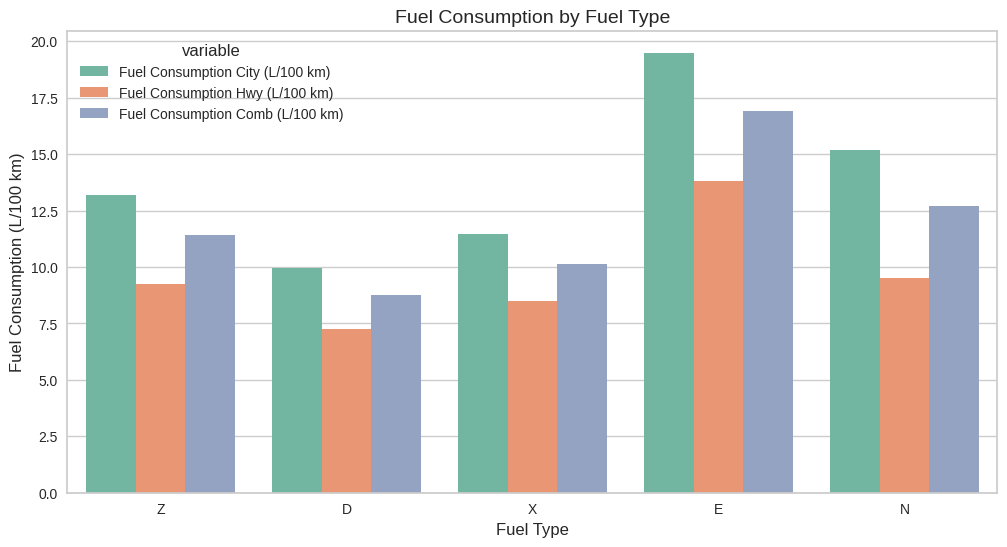

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x="Fuel Type", y="value", hue="variable",
            data=pd.melt(df_cleaned, id_vars="Fuel Type", 
                         value_vars=fuel_cols),
            palette="Set2", ci=None)
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Fuel Consumption (L/100 km)", fontsize=12)
plt.title("Fuel Consumption by Fuel Type", fontsize=14)
plt.show()


This chart shows how different fuels stack up when it comes to how much they burn in city, highway, and mixed driving.
**City driving** uses the **most fuel** across the board, no shock there.
**Fuel E i**s the **biggest gas guzzler**, especially in the city, while Z isn’t far behind. D and N are somewhere in the middle, not super efficient but not awful either.
Fuel X is clearly the winner here.  it uses the least fuel no matter where you’re driving. 

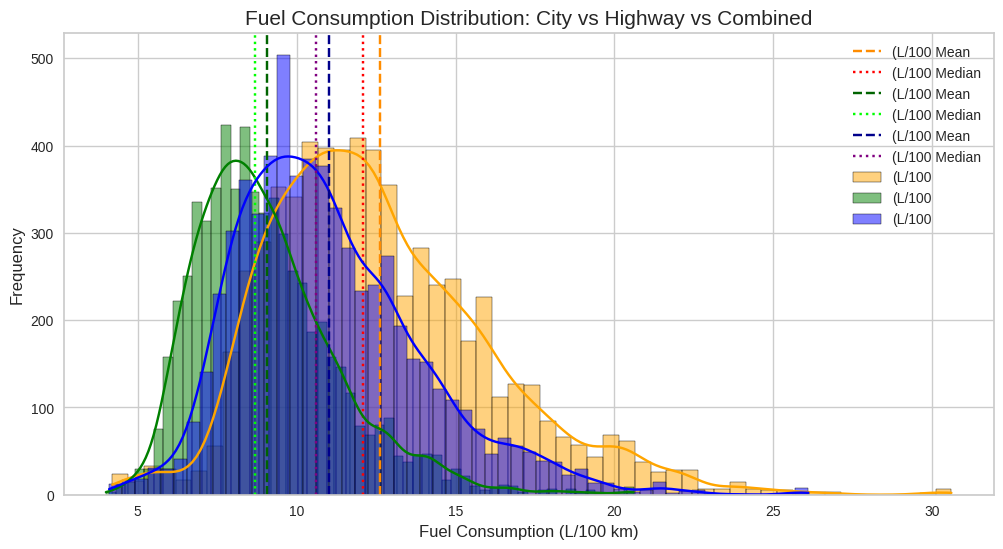

In [29]:
plt.figure(figsize=(12,6))

for col in fuel_cols:
    sns.histplot(df_cleaned[col], kde=True, color=colors[col], alpha=0.5, label=col.split()[-2])  
    
    plt.axvline(df_cleaned[col].mean(), color=mean_colors[col], linestyle="--", label=f"{col.split()[-2]} Mean")
    plt.axvline(df_cleaned[col].median(), color=median_colors[col], linestyle=":", label=f"{col.split()[-2]} Median")

plt.xlabel("Fuel Consumption (L/100 km)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Fuel Consumption Distribution: City vs Highway vs Combined", fontsize=15)
plt.legend()
plt.show()


### Categorical Feature Impact on CO₂ Emissions

In [30]:
def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    n_total = len(values)
    grand_mean = np.mean(values)
    
    ss_between = 0
    for i in range(cat_num):
        cat_values = values[fcat == i]
        ss_between += len(cat_values) * (np.mean(cat_values) - grand_mean)**2
    
    ss_total = np.sum((values - grand_mean)**2)
    return ss_between / ss_total if ss_total != 0 else 0

categorical_features = df.select_dtypes(include=['object']).columns

results = []

for feature in categorical_features:
    groups = [df["CO2 Emissions(g/km)"][df[feature] == cat].values for cat in df[feature].unique()]
    
    kruskal_result = kruskal(*groups)
    
    eta2 = correlation_ratio(df[feature], df["CO2 Emissions(g/km)"])
    
    results.append({
        "Feature": feature,
        "Kruskal_H": kruskal_result.statistic,
        "p_value": kruskal_result.pvalue,
        "Correlation_ratio": eta2
    })

results_df = pd.DataFrame(results).sort_values(by="Correlation_ratio", ascending=False)
results_df


Feature    Kruskal_H        p_value  Correlation_ratio
1          Model  7032.535085   0.000000e+00           0.957405
0           Make  2666.337123   0.000000e+00           0.373560
2  Vehicle Class  2659.559464   0.000000e+00           0.351283
3   Transmission  2127.409849   0.000000e+00           0.268174
4      Fuel Type   561.659806  3.069798e-120           0.074699

This table shows how different categorical features affect CO₂ emissions, using Kruskal-Wallis for statistical significance and correlation ratio (η²) to measure impact strength.

The **Model of the car** stands out big time  with a correlation almost **ratio of 0.96**, it explains almost all the variation in CO₂ emissions. That makes sense since different models have different engines, weights, and designs that directly affect fuel use.

**Make** (the brand) and Vehicle Class (like SUV, sedan, etc.) **have a moderate impac**t, with η² around 0.35–0.37. 

**Transmission type has a weaker effect** (η² ≈ 0.27), though still statistically significant.

**Fuel Type has the lowest impact** (η² ≈ 0.075), even though it’s highly significant statistically. So while fuel type does make a difference, it doesn’t explain much of the variation in emissions compared to other features.

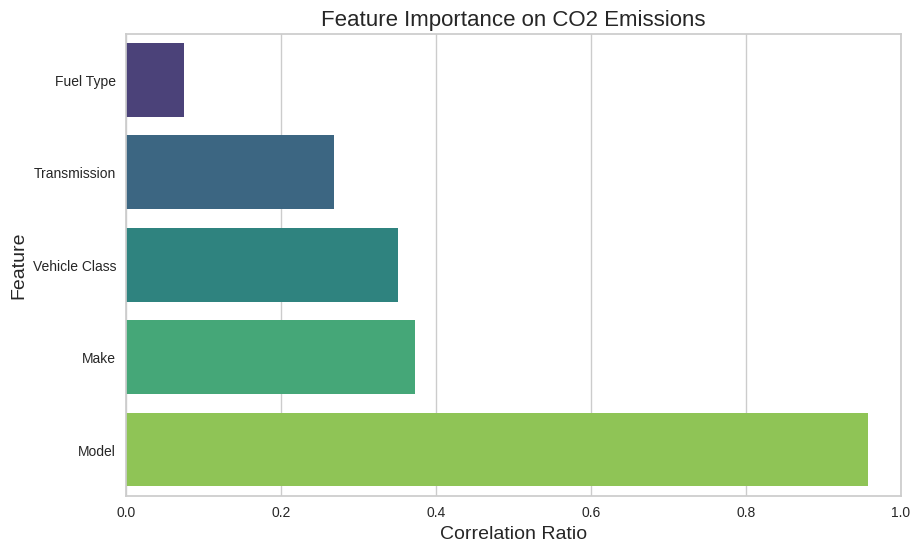

In [31]:
df_corr = results_df.sort_values(by="Correlation_ratio", ascending=True)
plt.figure(figsize=(10,6))
sns.barplot(x="Correlation_ratio", y="Feature", data=df_corr, palette="viridis")
plt.xlabel("Correlation Ratio", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.title("Feature Importance on CO2 Emissions", fontsize=16)
plt.xlim(0,1) 
plt.show()


### Distributio of Numerical fetures

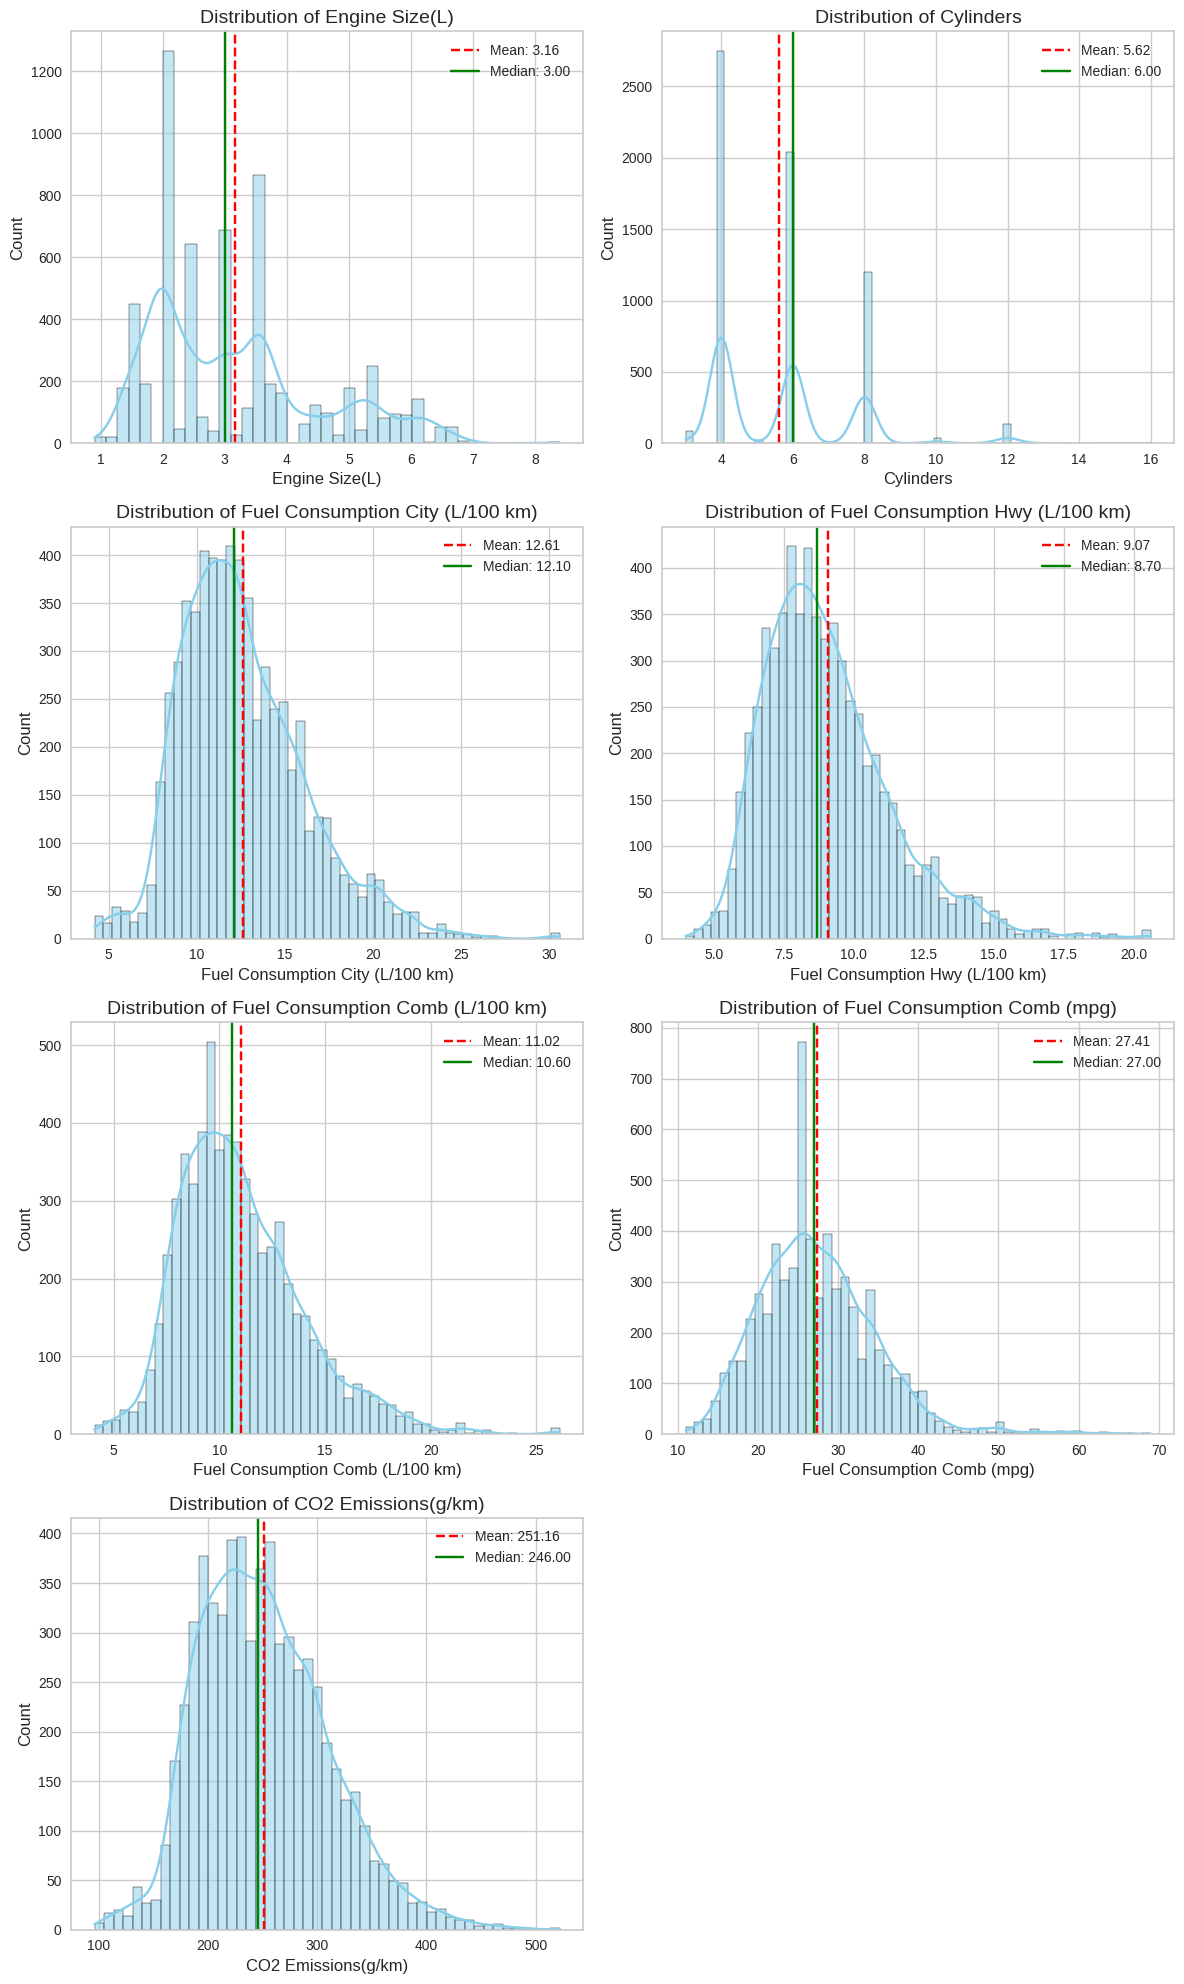

In [32]:
numerical_df = df_cleaned.select_dtypes(include=['number'])

num_vars = len(numerical_df.columns)
cols = 2 
rows = (num_vars // cols) + (num_vars % cols > 0)

plt.figure(figsize=(12, rows * 5))

for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data=numerical_df, x=var, kde=True, color='skyblue', edgecolor='black')
    
    mean_val = numerical_df[var].mean()
    median_val = numerical_df[var].median()
    
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    
    plt.title(f'Distribution of {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend()

plt.tight_layout()
plt.show()


As we can see , Most distributions are slightly skewed, with mean > median, showing that a few extreme values (like big engines or high fuel consumption) are influencing the averages.

Fuel efficiency (mpg) and CO₂ emissions are closely tied which meanss the lower the mpg, the higher the emissions.

The dataset seems to have a mix of regular and high-performance vehicles, which explains the spread.

### Pair Plot Analysis

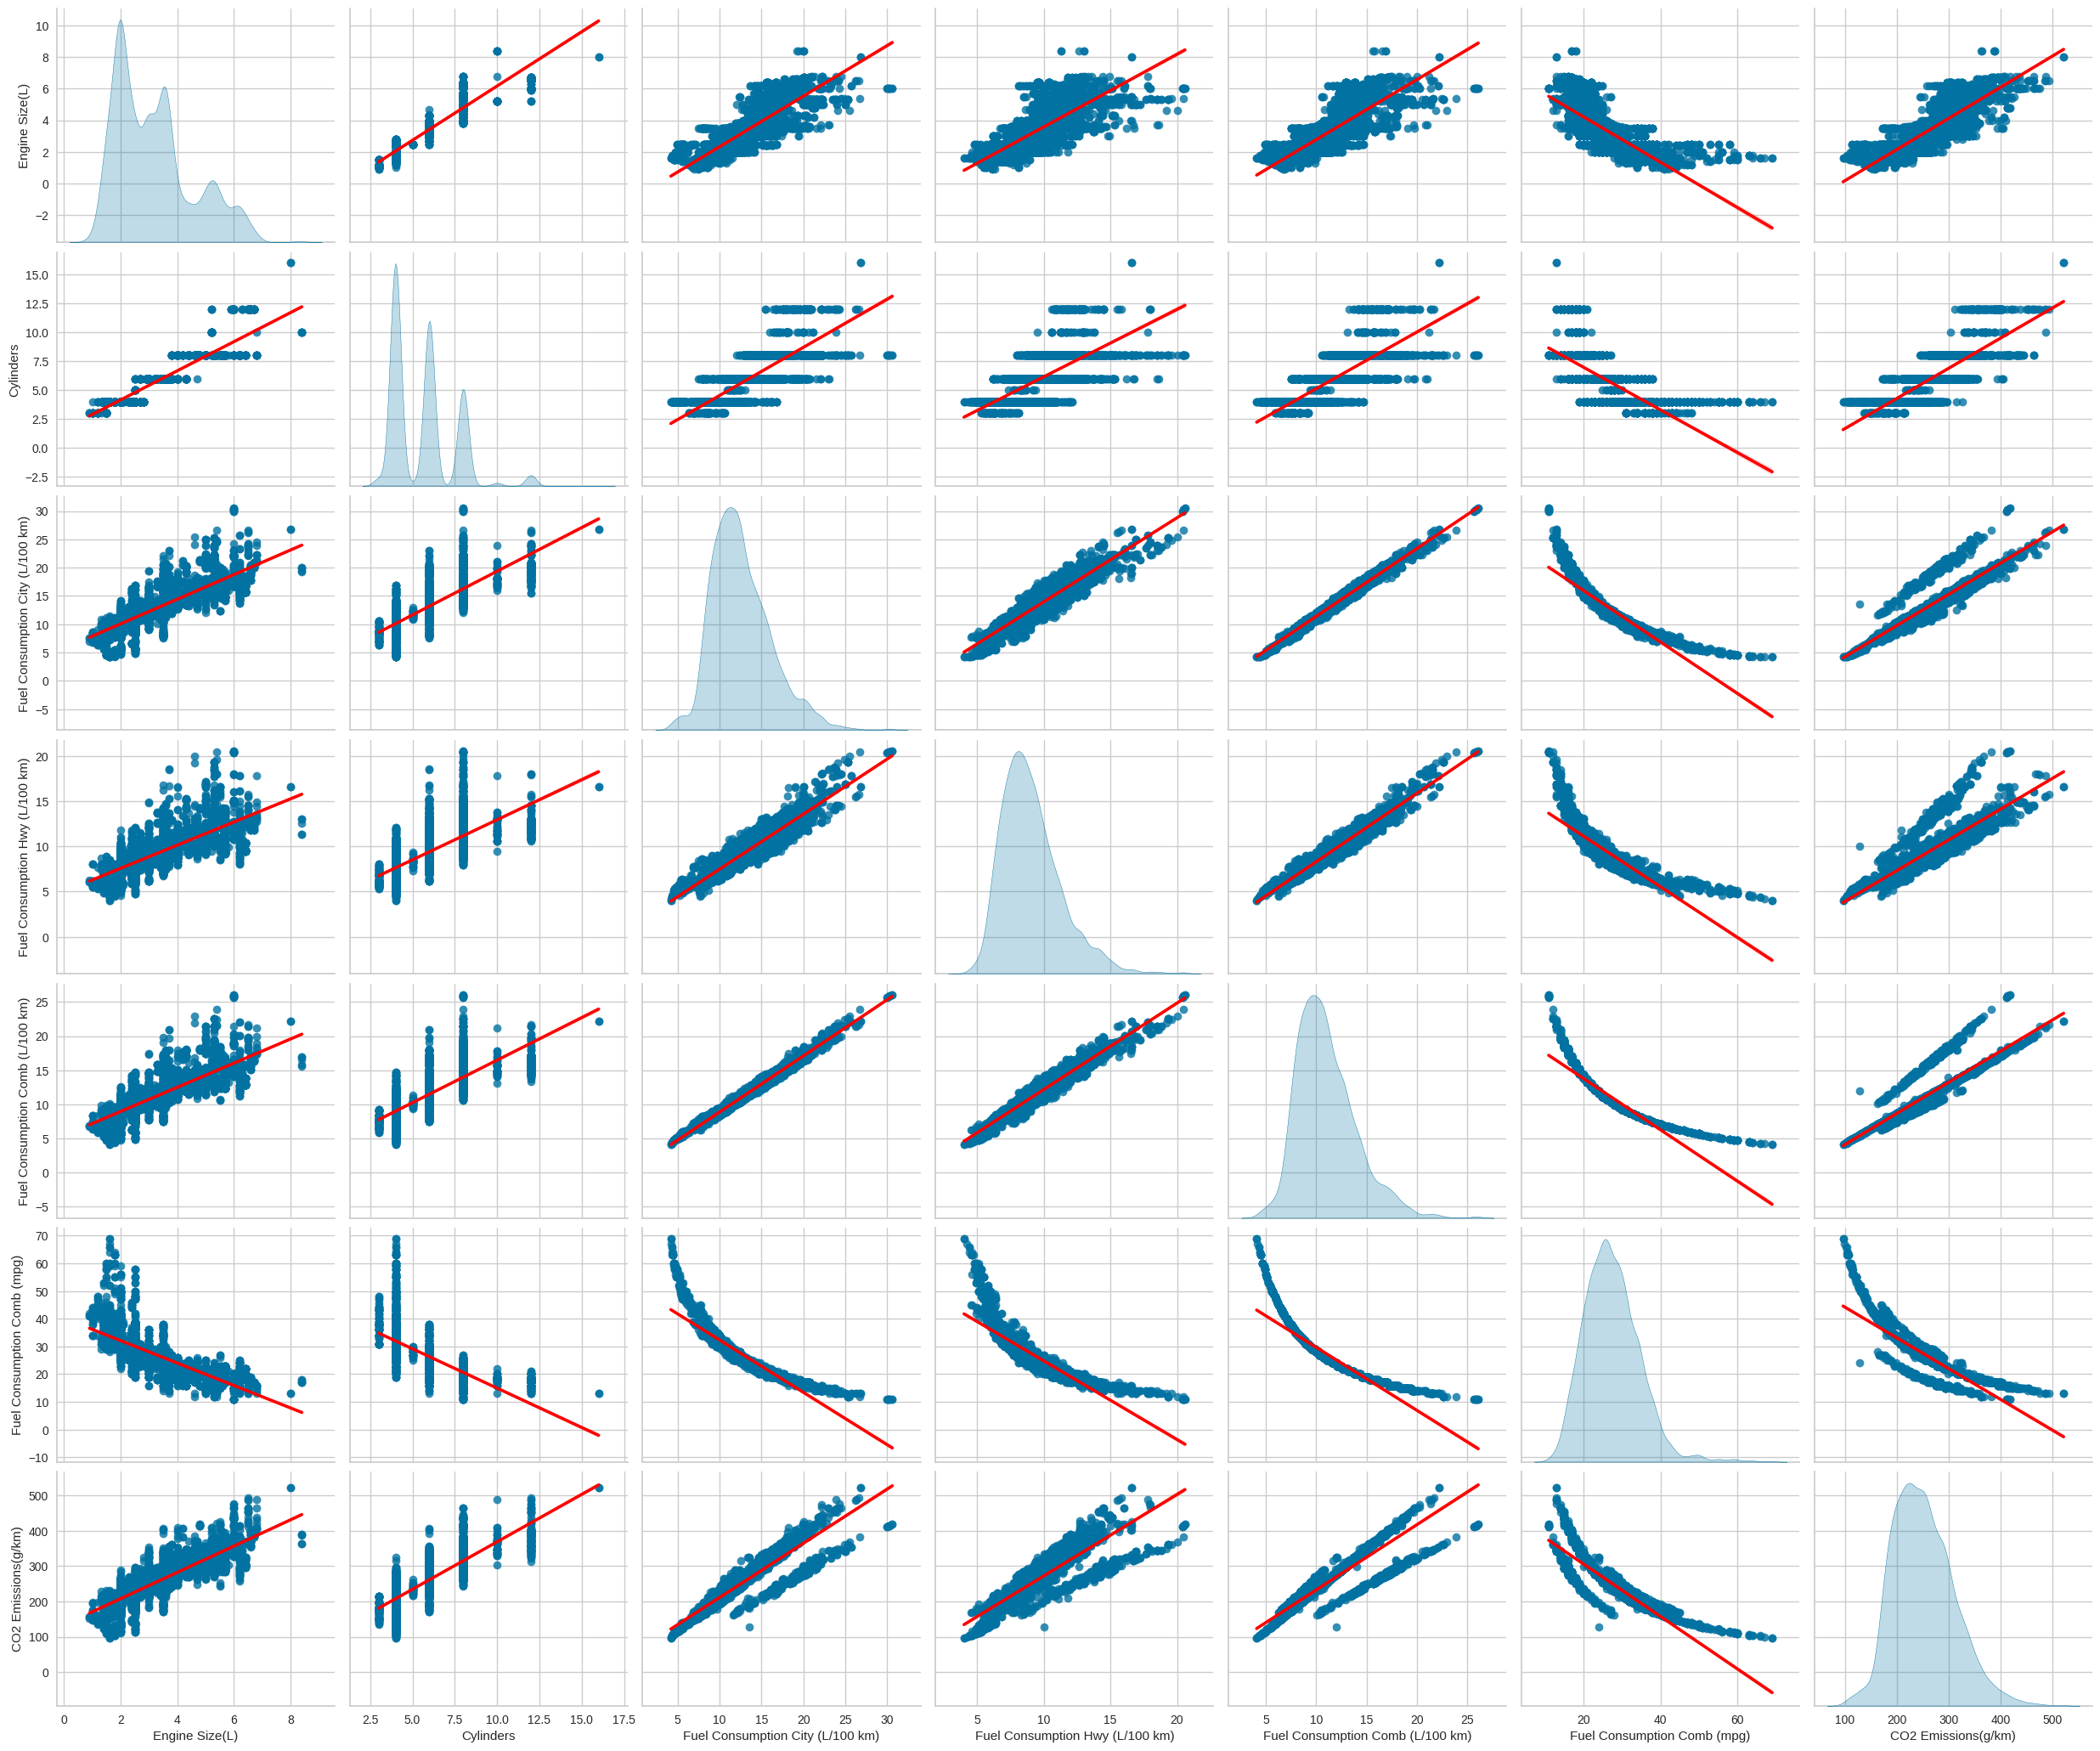

In [33]:
sns.pairplot(df_cleaned,
             kind="reg",
             diag_kind="kde", 
             plot_kws={"line_kws": {"color": "red"}},
             height=3,        
             aspect=1.2       
            )


#### **Engine Size vs CO₂ Emissions**
There is a clear and strong positive correlation between engine size and CO₂ emissions. As the engine size increases, the amount of CO₂ emitted by the vehicle also tends to rise. This makes intuitive sense, as larger engines typically require more fuel to operate, which in turn leads to higher emissions. The red regression line in the scatter plots reinforces this trend, showing a consistent upward slope. This relationship is important for understanding how engine specifications impact environmental performance.

#### **Cylinders vs Fuel Consumption & CO₂ Emissions**
The number of cylinders in a vehicle’s engine is closely linked to both fuel consumption and CO₂ emissions. Vehicles with more cylinders generally consume more fuel and produce more emissions. This is because engines with more cylinders are often designed for higher power output, which comes at the cost of efficiency. The pair plot shows a clear upward trend in these relationships, indicating that cylinder count is a strong predictor of a car’s environmental impact. This insight can be useful when comparing vehicle types or designing cleaner engine technologies.

#### **Fuel Consumption (City, Hwy, Combined)**
Fuel consumption metrics across city, highway, and combined driving conditions are highly correlated. Vehicles that consume more fuel in city driving tend to also consume more on highways and in combined scenarios. This suggests that fuel efficiency is generally consistent across different driving environments for a given vehicle. The scatter plots between these variables show tight clusters and strong linear relationships, which confirms that these metrics are interdependent. Understanding this can help simplify fuel efficiency analysis by focusing on just one of these measures.

#### **Fuel Consumption (mpg) vs Other Variables**
Fuel consumption measured in miles per gallon (mpg) behaves inversely compared to the other fuel metrics and CO₂ emissions. Higher mpg values indicate better fuel efficiency, meaning the vehicle travels more distance per unit of fuel. As a result, vehicles with higher mpg ratings tend to have lower fuel consumption in liters per 100 km and emit less CO₂. This inverse relationship is clearly visible in the pair plot, where the red regression lines slope downward. It highlights mpg as a key indicator of eco-friendliness in vehicle performance.

#### **Distribution of Variables**

The diagonal plots in the pair plot show the distribution of each variable. Most continuous variables, such as CO₂ emissions and fuel consumption, appear to follow roughly normal distributions, with a central peak and tapering tails. In contrast, the number of cylinders shows a discrete distribution, with distinct peaks at common values like 4, 6, and 8. These distribution patterns help identify the nature of each variable and guide appropriate statistical or modeling techniques. For example, discrete variables may require different handling than continuous ones in regression models.

## Label Encoding

In [34]:
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

df_encoded = df_cleaned.copy()

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()


Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0     0   1057              0             2.0          4            14   
1     0   1057              0             2.4          4            25   
2     0   1058              0             1.5          4            22   
3     0   1233             11             3.5          6            15   
4     0   1499             11             3.5          6            15   

   Fuel Type  Fuel Consumption City (L/100 km)  \
0          4                               9.9   
1          4                              11.2   
2          4                               6.0   
3          4                              12.7   
4          4                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

## Corrolation Matrix

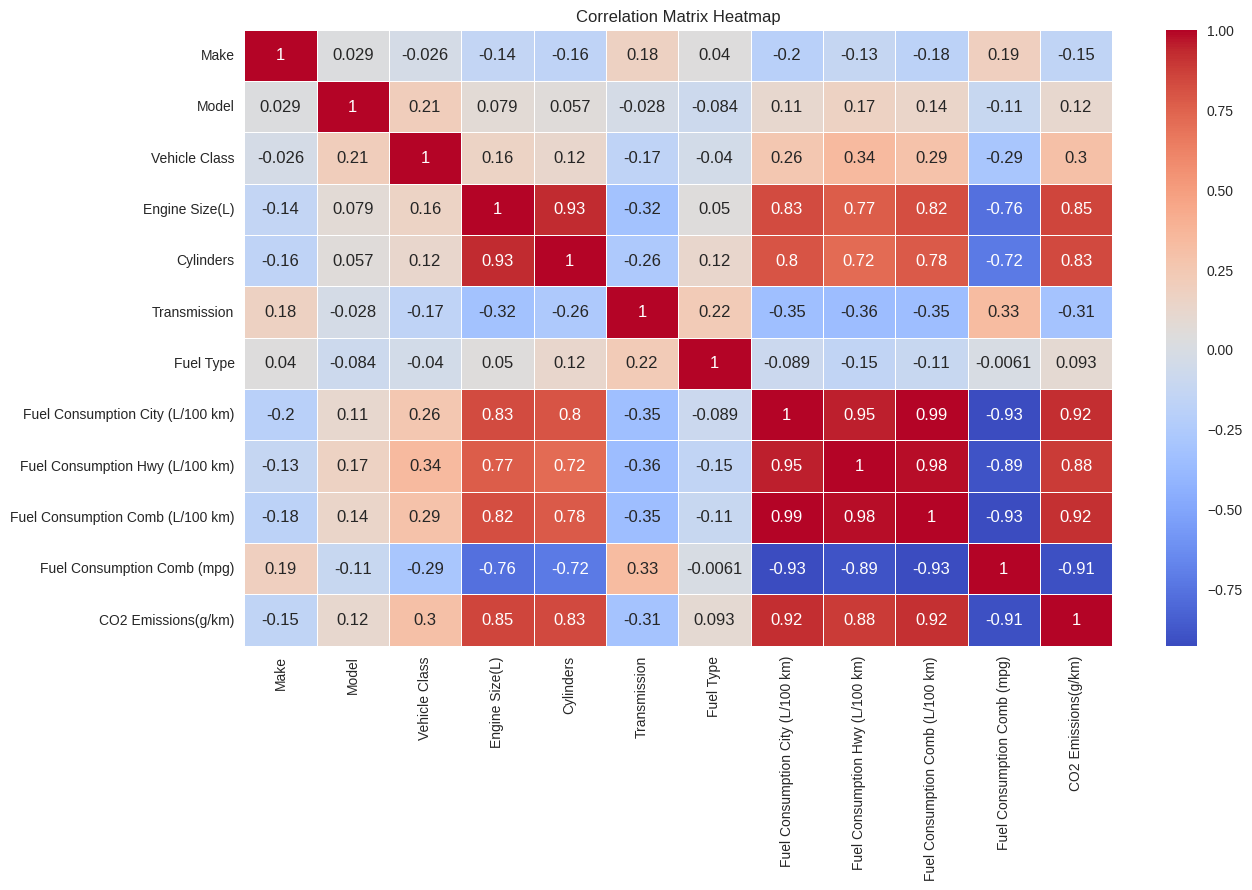

In [35]:
correlation_matrix = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(14,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Looking at the correlation heatmap, several strong relationships become clear. Engine size and cylinder count are highly correlated, which makes sense since larger engines typically have more cylinders. Fuel consumption values — whether in the city, on the highway, or combined — are also closely linked. Vehicles that consume more fuel in one setting tend to do so across the board.

There’s a strong positive correlation between fuel consumption and CO₂ emissions, meaning that less efficient cars generally produce more pollution. On the other hand, miles per gallon (mpg) shows strong negative correlations with both fuel consumption and emissions. In other words, vehicles with better fuel economy tend to have smaller engines, fewer cylinders, and lower CO₂ output.

Some features, like the vehicle’s make or fuel type, show weak correlations with performance and emissions. Transmission has a slightly stronger relationship, particularly with mpg, but it’s still not among the top predictors.

Some features in the dataset are highly correlated (correlation > 0.90), which means they carry redundant information. Keeping all of them could cause multicollinearity in regression models, leading to unstable estimates and less interpretable results. Therefore, for each group of highly correlated features, only one representative feature is retained, and the others are removed to simplify the model and avoid redundancy.

In [36]:
data=df_encoded.copy()

In [37]:
df

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km) Engine Size Bin  
0                              33                  196            0–2L  
1                              29                  221            2–3L  
2                              48                  136            0–2L  
3                              25                  255            3–4L  
4                              27                  244            3–4L  
...                           ...                  ...             ...  
7380                           30                  219            0–2L  
7381                           29                  232            0–2L  
7382                           27                  240            0–2L  
7383                           29                  232            0–2L  
7384                           26                  248            0–2L  

[7385 rows x 13 columns]

In [38]:
data = df_encoded.drop(columns=[
    'Fuel Consumption City (L/100 km)', 
    'Fuel Consumption Hwy (L/100 km)'
])


## Splitting Data

In [39]:
X = data.drop(columns=['CO2 Emissions(g/km)'])
y = data['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Training The Models

## LinearRegression

#### Training The Model

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Model Evaluation

In [41]:
y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [42]:
def evaluate_model(y_train, y_train_pred, y_test, y_test_pred, model_name, target=None):
    
    scores = {
        model_name+"_train": {
            "R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),                          
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))
        },
        model_name+"_test": {
            "R2" : r2_score(y_test, y_test_pred),
            "mae" : mean_absolute_error(y_test, y_test_pred),
            "mse" : mean_squared_error(y_test, y_test_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred))
        }
    }
    
    metrics_df = pd.DataFrame(scores)
    
    if target is not None:
        print(f"train RMSE / mean target: {metrics_df.loc['rmse', model_name+'_train'] / target.mean()}")
        print(f"test RMSE / mean target: {metrics_df.loc['rmse', model_name+'_test'] / target.mean()}")
    
    return metrics_df

In [43]:
metrics_df = evaluate_model(y_train, y_train_pred, y_test, y_pred, "LinearRegression", target=y)
print(metrics_df)


train RMSE / mean target: 0.06766621429711073
test RMSE / mean target: 0.07213961023678753
      LinearRegression_train  LinearRegression_test
R2                  0.917258               0.909032
mae                11.156445              11.980060
mse               288.826432             328.277229
rmse               16.994894              18.118422


**R² Score:** 
values for both test and train show that the model explains over 91% of the variance in the target variable, which is excellent. The small drop from train to test suggests good generalization.

**Mean Absolute Error (MAE):**
On average, the model's predictions deviate from the actual values by about 11–12 units. This is a relatively low error, indicating accurate predictions.

**Mean Squared Error (MSE):**
The test error is slightly higher than the training error, which is expected and suggests the model is **not overfitting**.

**Root Mean Squared Error (RMSE):**
RMSE provides a more interpretable error metric in the same units as the target. The test RMSE is only slightly higher than the training RMSE, again indicating **good generalization**.

**RMSE / Mean Target:**
This ratio shows that the model's error is less than 7% of the mean target value, which is a strong result.

#### Residual Plot Analysis

In [44]:
def plot_residuals(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    residuals = y_test - y_pred
    
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=y_test, y=residuals)
    plt.axhline(y=0, color="r", linestyle="--")
    plt.xlabel("Actual CO2 Emissions")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()
    
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()


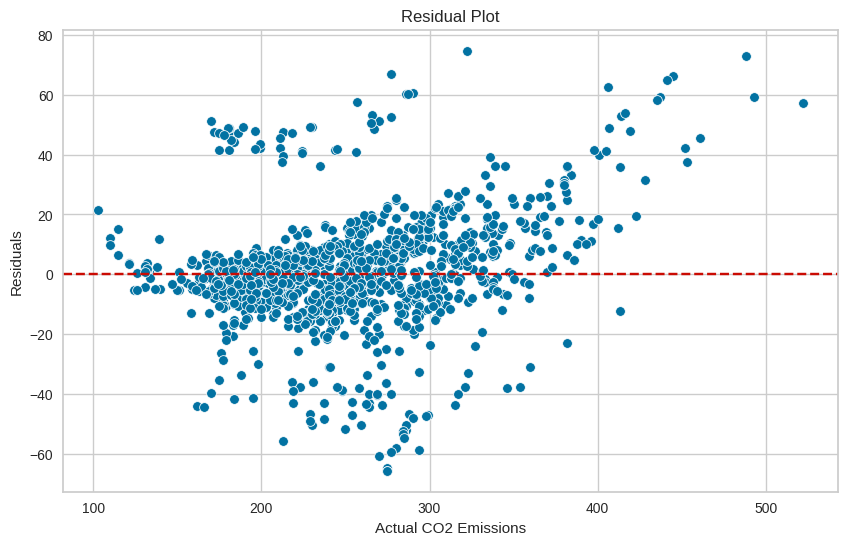

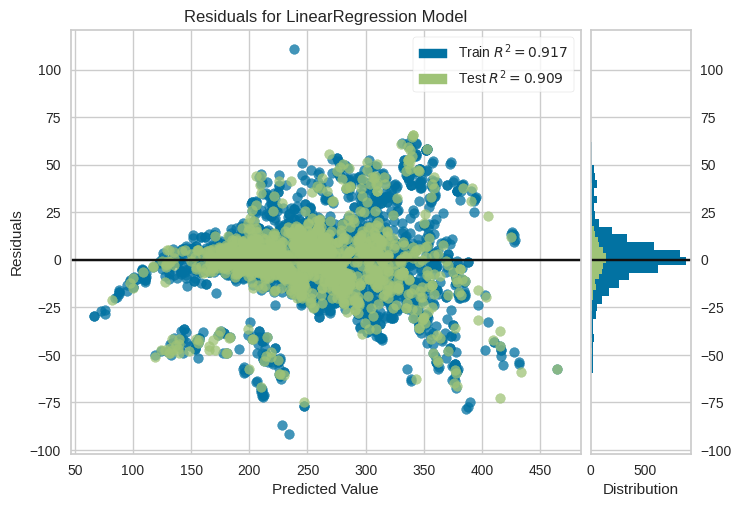

In [45]:
plot_residuals(lr, X_train, y_train, X_test, y_test)

#### Residuals vs. Predicted Values

In the first residual plot, which displays residuals against actual CO₂ emission values, the residuals are randomly scattered around the zero line. This pattern indicates that the model **does not exhibit systematic bias in its predictions**. The absence of any visible curvature or trend further supports the assumption of linearity, suggesting that a linear regression model is appropriate for this dataset.
While a few outliers are present, they do not dominate the overall pattern, and the residuals remain relatively well-behaved across the range of actual values. This plot includes data from both the training and testing sets, and the consistency in residual behavior across them reinforces the reliability of the model.

#### Residuals vs. Actual Values

The second plot presents residuals against predicted CO₂ emission values, with blue points representing the training set and green points representing the test set.
The histogram shows a roughly normal distribution of residuals, which supports the statistical assumptions underlying linear regression.
The R² values for the training and test sets are 0.917 and 0.909, respectively, which are both high and closely aligned. This confirms that the **model generalizes well and does not suffer from overfitting**, maintaining strong predictive performance on unseen data.

#### Prediction Error Plot

In [46]:
def plot_prediction_error(model, X_train, y_train, X_test, y_test):
    
    visualizer = PredictionError(model)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    visualizer.show()


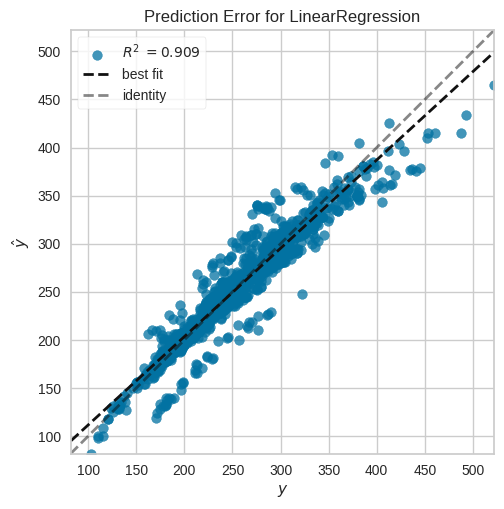

In [47]:
plot_prediction_error(lr, X_train, y_train, X_test, y_test)


As observed, the model performs quite well since the predictions closely align with the identity line, indicating strong accuracy and calibration

## Polynomial Features

In [48]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False) 
        poly_features = polynomial_converter.fit_transform(X)                      
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, 
                         "number of features":number_of_features}, index=range(1,d))

In [49]:
poly(8)


train_rmse_errors  test_rmse_errors  number of features
1          17.264245         17.120979                   9
2           7.384910          7.725957                  54
3           2.590853          3.346842                 219
4           3.531134          5.302560                 714
5           1.962774          9.904506                2001
6           2.037281         10.498886                5004
7           2.497305         29.930872               11439

Polynomial regression is like regular linear regression but with extra curve power. Instead of just fitting a straight line, it fits a curve by adding powers of the input features.

Degree = how curvy the model gets.

Degree 1 = straight line

Degree 2 = simple curve

Higher degrees = more twists and turns

Now, looking at the table, we'll notice that around degree 3, the model hits a sweet spot and the error is low, and it does well on both training and test data. But after that, things get sketchy.

Here’s why: as the degree goes up, the model starts fitting the training data too perfectly like it’s memorizing every little bump and noise which is called overfitting. we can spot it because the training error keeps dropping, but the test error starts going back up.
Basically, the model gets too confident and flops when it sees new data.

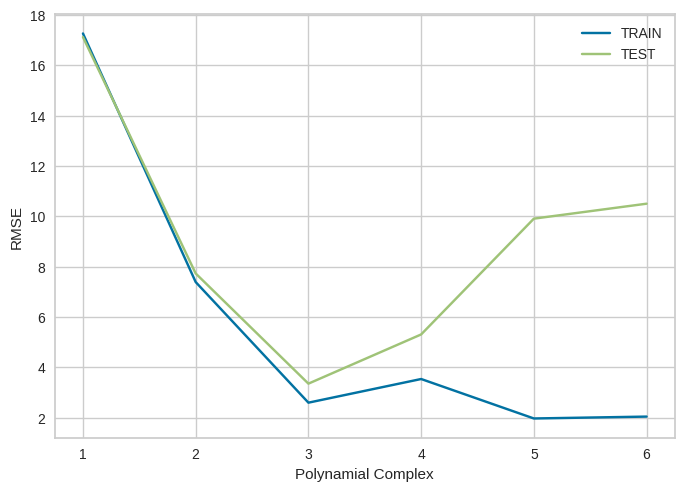

In [50]:
plt.plot(range(1,7), poly(7)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,7), poly(7)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend()
plt.show()

From the graph we can see both the TRAIN and TEST RMSE drop as we go from degree 1 to 3 which means the model is learning and improving. But after degree 3 The TRAIN error stays low (even drops a bit),But the TEST error starts climbing again.

That’s a classic sign of overfitting. The model is doing great on the training data because it’s memorizing all the tiny details, but it struggles with new, unseen data.

### Poly Degree 3 

In [51]:
poly = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

poly.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [52]:
y_train_pred = poly.predict(X_train)
y_test_pred = poly.predict(X_test)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Train RMSE: 2.7768
Test RMSE: 3.0052


In [53]:
metrics_df = evaluate_model(y_train, y_train_pred, y_test, y_test_pred, "PolynomialFeatures", target=y)
print(metrics_df)

train RMSE / mean target: 0.01105597264791057
test RMSE / mean target: 0.011965516583948059
      PolynomialFeatures_train  PolynomialFeatures_test
R2                    0.997791                 0.997497
mae                   2.083520                 2.340939
mse                   7.710581                 9.031421
rmse                  2.776793                 3.005232


**Train & Test RMSE**:
The ratio of RMSE to the mean target value is remarkably low for both training (0.0111) and test (0.0119) sets. This indicates that the model’s prediction error is just about 1% of the average target value, which is exceptionally precise. The closeness of these two values also suggests strong generalization and without signs of overfitting.

**R² Score**:
The R² values for the training (0.9977) and test (0.9974) sets are nearly perfect, meaning the model explains more than 99.7% of the variance in the target variable. This level of fit is rare and demonstrates that the polynomial regression model (degree 3) captures the underlying structure of the data extremely well. The minimal drop in R² from train to test further confirms the model’s robustness and reliability.

**Mean Absolute Error (MAE)**:

The MAE values( 2.08 for training and 2.34 for testing ) show that, on average, the model’s predictions deviate from the actual values by just a couple of units.

**RMSE & MSE**:
The RMSE values of 2.77 (train) and 3.00 (test) align closely, indicating that the model maintains a stable error profile across datasets. RMSE, being sensitive to larger errors, confirms that there are no significant outliers or extreme deviations affecting performance. The corresponding MSE values (7.77 for train and 9.03 for test) further support this conclusion, showing that the model’s squared error remains low and controlled.


### Cross Validation

In [54]:
def evaluate_model(y_train, y_train_pred, y_test, y_test_pred, model_name, target=None):
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)

    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    n_samples = len(target) if target is not None else "N/A"

    metrics_df = pd.DataFrame({
        "Model": [model_name],
        "Samples": [n_samples],
        "Train R²": [train_r2],
        "Test R²": [test_r2],
        "Train MAE": [train_mae],
        "Test MAE": [test_mae],
        "Train MSE": [train_mse],
        "Test MSE": [test_mse],
        "Train RMSE": [train_rmse],
        "Test RMSE": [test_rmse]
    })

    return metrics_df

In [55]:
Cross_v = evaluate_model(y_train, y_train_pred, y_test, y_test_pred, "PolynomialFeatures", target=y)
print(Cross_v)


                Model  Samples  Train R²   Test R²  Train MAE  Test MAE  \
0  PolynomialFeatures     6282  0.997791  0.997497    2.08352  2.340939   

   Train MSE  Test MSE  Train RMSE  Test RMSE  
0   7.710581  9.031421    2.776793   3.005232  


As we can see from the result of Cross_val , our model performig greate

#### Residual Plot Analysis

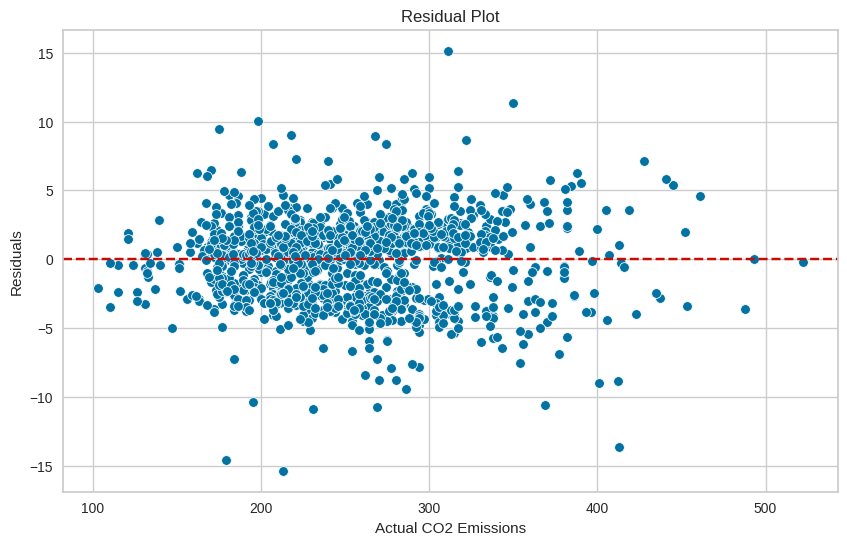

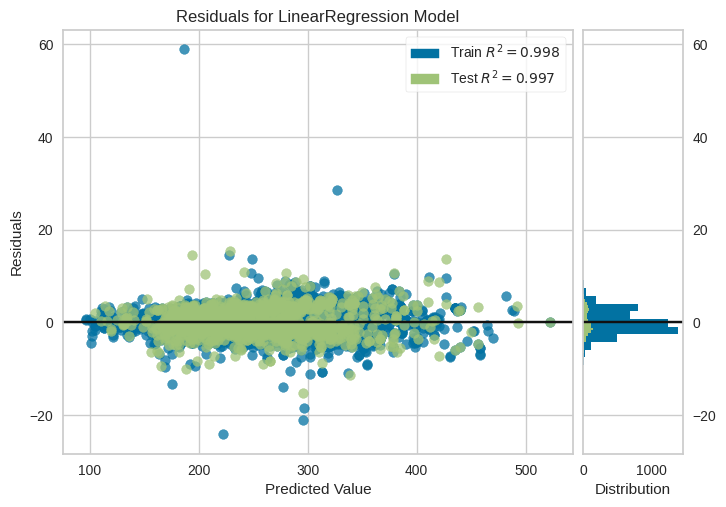

In [56]:
plot_residuals(poly, X_train, y_train, X_test, y_test)


The Polynomial Regression model demonstrates outstanding performance, with R² scores of 0.998 (train) and 0.997 (test), indicating it explains nearly all variance in the data. Error metrics such as MAE and RMSE are low and consistent, showing that the model generalizes well across folds. The residuals are symmetrically distributed around zero, without visible patterns, which suggests the model effectively captures the underlying structure of the data and avoids systematic bias.

**Compared to Linear Regression,** which also achieves high R² scores (0.998 train, 0.997 test), Polynomial Regression shows slightly better residual behavior. The residuals in the linear model exhibit **a mild skew**, especially in the test set, as seen in the histogram. This may indicate that Linear Regression struggles with capturing subtle non-linear relationships. Therefore, while both models perform exceptionally well, Polynomial Regression offers a slight edge in terms of error distribution and robustness.

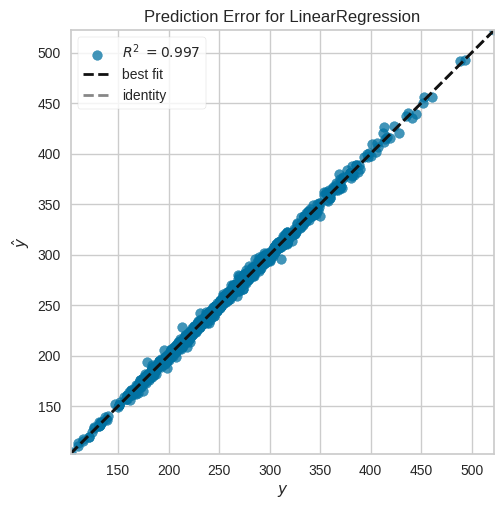

In [57]:
plot_prediction_error(poly, X_train, y_train, X_test, y_test)


With (R² = 0.997), predictions closely aligned to actual valuesCompared to Linear Regression, which also performs well, Polynomial Regression handles non-linear patterns slightly better, with cleaner residuals and more consistent errors.


## DecisionTreeRegressor

#### Training The Model

In [58]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

#### Model Evaluation

In [59]:
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

metrics_df = evaluate_model(y_train, y_train_pred, y_test, y_test_pred, "DecisionTreeRegressor", target=y)
print(metrics_df)


                   Model  Samples  Train R²   Test R²  Train MAE  Test MAE  \
0  DecisionTreeRegressor     6282  0.997791  0.997497    2.08352  2.340939   

   Train MSE  Test MSE  Train RMSE  Test RMSE  
0   7.710581  9.031421    2.776793   3.005232  


The Decision Tree model performs impressively, with R² scores of 0.9978 (train) and 0.9975 (test), showing it captures nearly all variance in the data. RMSE and MAE values are low and consistent across both sets (RMSE ≈ 2.78 train, 3.01 test), indicating strong generalization and minimal overfitting. The error ratios to the mean target are also very small (~1.1%), confirming precise predictions.

**Compared to Polynomial Regression**, the Decision Tree delivers nearly identical performance. However, while Polynomial Regression fits smooth curves, Decision Trees split data into segments, which can be more interpretable but sometimes less stable with noisy data.

Overall, both models are highly accurate, with only minor differences in behavior.

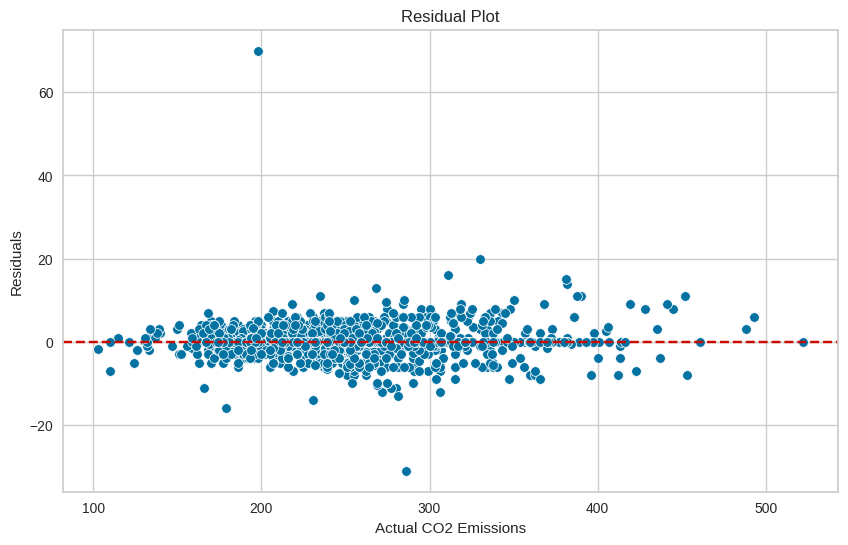

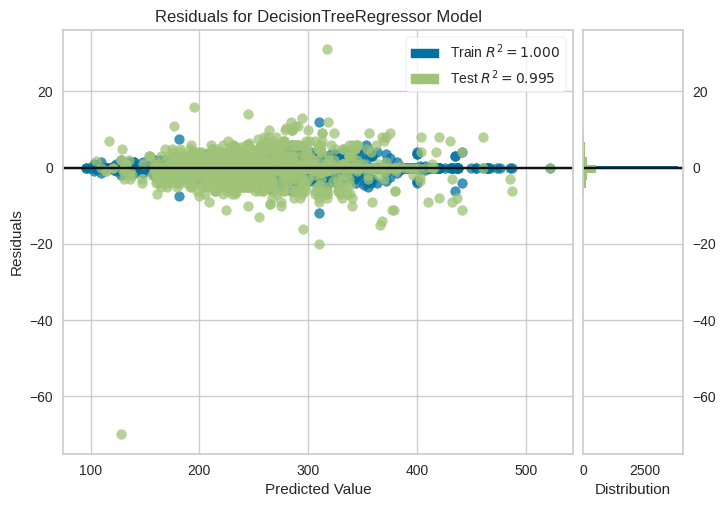

In [60]:
plot_residuals(dt_model, X_train, y_train, X_test, y_test)


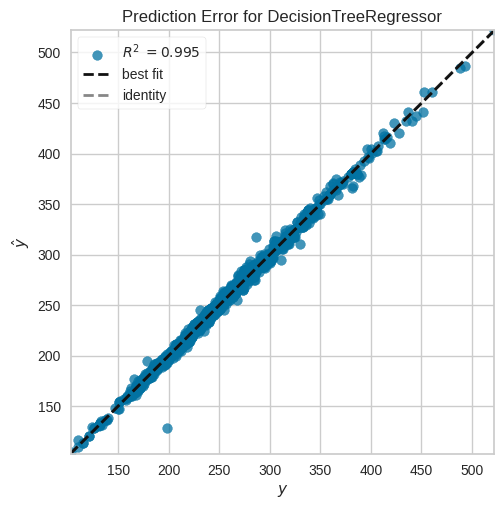

In [61]:
plot_prediction_error(dt_model, X_train, y_train, X_test, y_test)

The residual plots for the Decision Tree Regressor reveal a model that fits the training data almost perfectly with Train R² = 0.995, and residuals tightly clustered around zero. 
Compared to Decision Tree, Linear Regression produces uniformly distributed residuals without sharp jumps, making it more robust in scenarios with continuous and linear relationships. 
we ca see, the Decision Tree shows signs of overfitting and instability at extremes, whereas Polynomial and Linear Regression offer smoother and more consistent error behavior across the prediction range.

#### Validation Curve

In [62]:
def validation_curve_rmse(model_class, param_name, param_range, 
                          X_train, y_train, X_test, y_test, **kwargs):
    
    train_rmse, test_rmse = [], []

    for param_value in param_range:
        model = model_class(**{param_name: param_value}, **kwargs)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    plt.figure(figsize=(8,5))
    plt.plot(param_range, train_rmse, label="Train RMSE", marker="o")
    plt.plot(param_range, test_rmse, label="Test RMSE", marker="s")
    plt.xlabel(param_name)
    plt.ylabel("RMSE")
    plt.title(f"Validation Curve for {model_class.__name__} ({param_name})")
    plt.legend()
    plt.show()


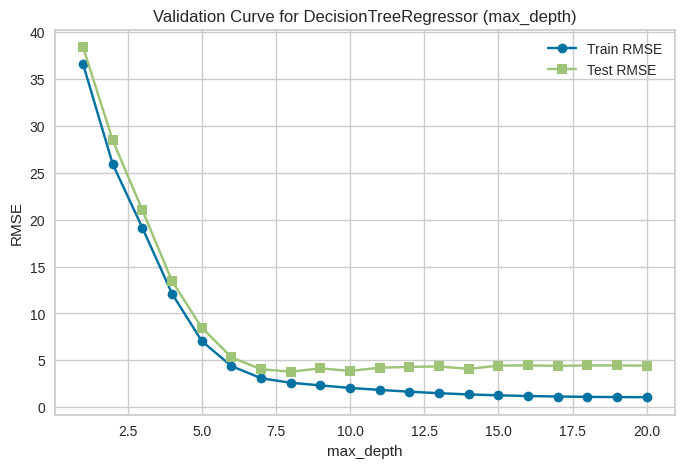

In [63]:
validation_curve_rmse(DecisionTreeRegressor, "max_depth", range(1, 21), 
                      X_train, y_train, X_test, y_test, random_state=42)


In this graph we can see , the deeper the tree gets, the better it learns at first up to like depth 5, things improve fast. After that, it’s kinda pointless. The train error keeps dropping, but the test error just chills and doesn’t get much better. That’s a sign it’s starting to overfit.

## KNeighborsRegressor

#### Training The Model

In [64]:
knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

#### Model Evaluation 

In [65]:
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)
metrics_knn = evaluate_model(y_train, y_train_pred_knn, y_test, y_test_pred_knn, "KNN", target=y)
print(metrics_knn)


  Model  Samples  Train R²   Test R²  Train MAE   Test MAE   Train MSE  \
0   KNN     6282  0.945367  0.901427   8.608119  11.895465  190.706332   

     Test MSE  Train RMSE  Test RMSE  
0  355.721337   13.809646  18.860576  


The KNN model shows noticeably weaker performance compared to the others. With R² scores of 0.945 (train) and 0.901 (test), it captures less variance in the data. RMSE values are relatively high 13.81 for training and 18.86 for testing and when normalized by the mean target, the error ratios are around 5.5% and 7.5%, which is significantly higher than the ~1% seen in Decision Tree and Polynomial models. 

The MAE values (≈8.6 train, ≈11.9 test) also reflect this gap. 

We can say that, KNN struggles to generalize well and delivers less precise predictions, making it a weaker choice for this dataset.

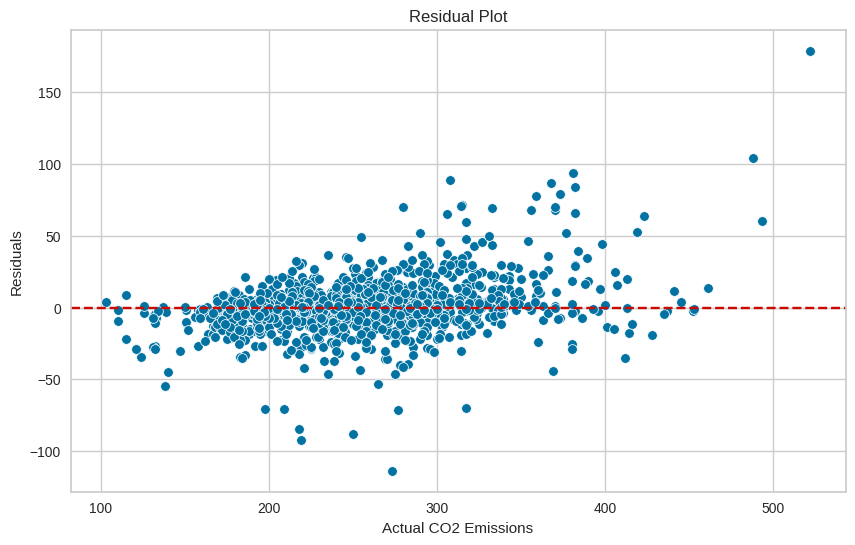

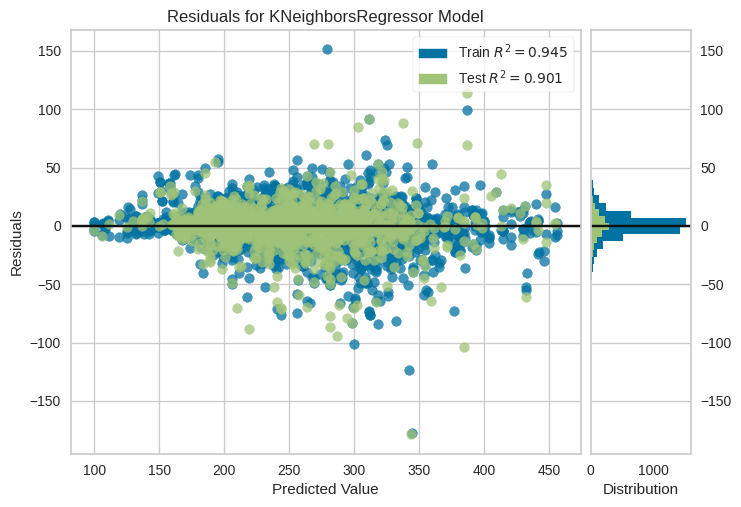

In [66]:
plot_residuals(knn_model, X_train, y_train, X_test, y_test)


KNN show a wide spread of errors, especially compared to the other models.
In the second plot, both training and test residuals are scattered broadly across the range, with values reaching up to ±150. This indicates inconsistent predictions.

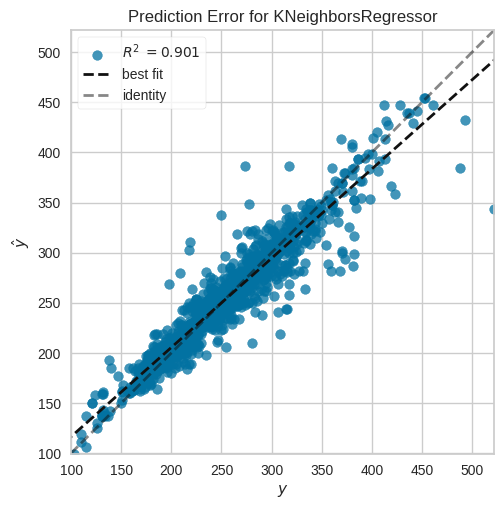

In [67]:
plot_prediction_error(knn_model, X_train, y_train, X_test, y_test)

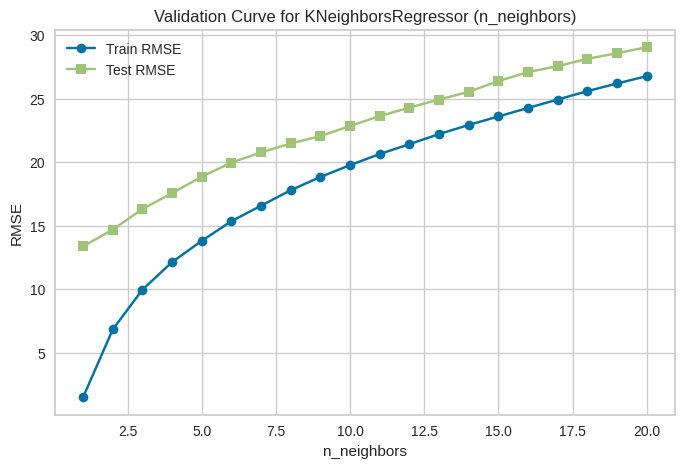

In [68]:
validation_curve_rmse(KNeighborsRegressor, "n_neighbors", range(1, 21), 
                      X_train, y_train, X_test, y_test)


As neighbors increase, the model becomes smoother and more biased, which hurts accuracy on both train and test sets. There's no clear sweet spot here performance just declines with more neighbors.

## Model Comparision

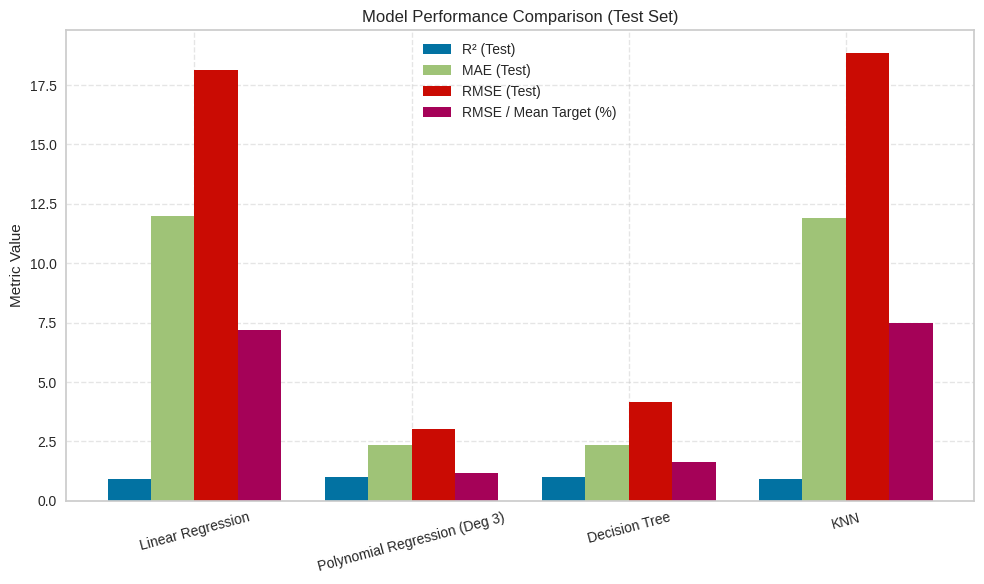

In [71]:
try:
    mean_target
except NameError:
    mean_target = y_test.mean()

models = {
    'Linear Regression': lr,
    'Polynomial Regression (Deg 3)': poly,
    'Decision Tree': dt_model,
    'KNN': knn_model
}

results = []

for name, model in models.items():
    y_pred_test = model.predict(X_test)
    r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    ratio = rmse / mean_target * 100

    results.append({
        'Model': name,
        'R² (Test)': r2,
        'MAE (Test)': mae,
        'RMSE (Test)': rmse,
        'RMSE / Mean Target (%)': ratio
    })

results_df = pd.DataFrame(results)

metrics = ['R² (Test)', 'MAE (Test)', 'RMSE (Test)', 'RMSE / Mean Target (%)']
x = np.arange(len(results_df['Model']))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + (i - 1.5)*width, results_df[metric], width, label=metric)

ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=15)
ax.set_title('Model Performance Comparison (Test Set)')
ax.set_ylabel('Metric Value')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**Polynomial Regression** (Degree 3) performs best: it has high R² and low error metrics across the board.

**KNN** struggles the most, likely due to its sensitivity to noise and lack of generalization in this dataset.

**Linear Regression** is too simple to capture nonlinear relationships, which leads to higher errors.

**Decision Tree** performs well but may be prone to overfitting depending on the data.

##  Conclusion

We went through a complete modeling pipeline, starting with thorough exploratory data analysis (EDA). Each feature was examined individually and in relation to the target variable, allowing us to understand their influence and interactions. After gaining insights from the data, we prepared it for modeling and performed a light feature selection to retain the most relevant inputs.

Next, we evaluated four regression models: Linear Regression, Polynomial Regression, Decision Tree, and K-Nearest Neighbors (KNN). Based on performance metrics and residual analyses, Polynomial Regression emerged as the most reliable model. It offered a strong balance between accuracy and generalization, with low error rates and stable residual behavior across the prediction range.

Given the strength of the results and the clarity of the validation, we chose not to pursue further optimization for the other models  such as grid search or hyperparameter tuning.Instead, we focused on selecting the optimal polynomial degree, which led to a well-designed model with excellent predictive performance.

In the end, we successfully built a robust regression model that captures the complexity of the data while maintaining precision and generalization.